## Rainfall Weather Forecasting Project

Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Link

https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
https://github.com/dsrscientist/dataset3

## Rainfall Weather Forecasting Project - Classification to predict whether or not it will rain tomorrow.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

## Data Collection

In [364]:
rainfall_weather_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
rainfall_weather_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [365]:
rainfall_weather_df.head(2)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   

   RainTomorrow  
0            No  
1            No  

[2 rows x 23 columns]

Observation:
            1. Label (i.e. "RainTomorrow") contains classification data so this is a Classification 
               Problem.
            2. Binary Classification Problem

In [366]:
rainfall_weather_df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

Observation:
            1. It's Binary Classification Problem

## Exploratory Data Analysis

In [367]:
rainfall_weather_df.shape

(8425, 23)

In [368]:
rainfall_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [369]:
rainfall_weather_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

## Handle Null values

In [370]:
rainfall_weather_df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

Observation:
            1. Most of the columns have NULL values

In [371]:
rainfall_weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [372]:
rainfall_weather_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [373]:
rainfall_weather_df.nunique().to_frame("No. of Unique Values")

No. of Unique Values
Date                           3004
Location                         12
MinTemp                         285
MaxTemp                         331
Rainfall                        250
Evaporation                     116
Sunshine                        140
WindGustDir                      16
WindGustSpeed                    52
WindDir9am                       16
WindDir3pm                       16
WindSpeed9am                     34
WindSpeed3pm                     35
Humidity9am                      90
Humidity3pm                      94
Pressure9am                     384
Pressure3pm                     374
Cloud9am                          9
Cloud3pm                          9
Temp9am                         304
Temp3pm                         328
RainToday                         2
RainTomorrow                      2

In [374]:
# check the value counts of each column

for i in rainfall_weather_df.columns:
    print(rainfall_weather_df[i].value_counts())
    print('\n')

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


 12.0    74
 13.2    71
 13.8    69
 12.7    68
 16.4    67
         ..
 0.3      1
 28.3     1
-1.1      1
-1.4      1
 26.0     1
Name: MinTemp, Length: 285, dtype: int64


19.0    87
23.8    75
19.8    74
25.0    71
22.0    68
        ..
11.2     1
43.1     1
42.7     1
42.9     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64


0.0      5299
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
61.2        1
128.0       1
90.0        1
34.4        1
40.0        1
Name: R

In [375]:
rainfall_weather_df.shape

(8425, 23)

In [376]:
rainfall_weather_df.isnull().sum() 

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [377]:
rainfall_weather_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [378]:
# Handle all features Null values  - Float type

for i in rainfall_weather_df.columns:
    if rainfall_weather_df.dtypes[i] == 'float64':
        rainfall_weather_df[i] = rainfall_weather_df[i].fillna(rainfall_weather_df[i].mean())

In [379]:
rainfall_weather_df.isnull().sum() 

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [380]:
# Handle features Null values - Object type

rainfall_weather_df['WindGustDir'] = rainfall_weather_df['WindGustDir'].fillna(rainfall_weather_df['WindGustDir'].mode()[0])

rainfall_weather_df['WindDir9am'] = rainfall_weather_df['WindDir9am'].fillna(rainfall_weather_df['WindDir9am'].mode()[0])

rainfall_weather_df['WindDir3pm'] = rainfall_weather_df['WindDir3pm'].fillna(rainfall_weather_df['WindDir3pm'].mode()[0])

rainfall_weather_df['RainToday'] = rainfall_weather_df['RainToday'].fillna(rainfall_weather_df['RainToday'].mode()[0])

rainfall_weather_df['RainTomorrow'] = rainfall_weather_df['RainTomorrow'].fillna(rainfall_weather_df['RainTomorrow'].mode()[0])

In [381]:
rainfall_weather_df.isnull().sum() 

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Observation:
            1. There are no NULL values

## check for any blank records

In [382]:
for i in rainfall_weather_df.columns:
    print(rainfall_weather_df.loc[rainfall_weather_df[i] == ' '])

Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow]
Index: []

[0 rows x 23 columns]
Empty DataFrame
Columns: [Date, Locat

Observation:
            1. checked all 23 columns but none have any blank values

## check the duplicate values in rows

In [383]:
rainfall_weather_df.shape

(8425, 23)

In [384]:
rainfall_weather_df.duplicated().sum()

1663

In [385]:
# remove 1663 duplicate values in rows

rainfall_weather_df.drop_duplicates(ignore_index = True, inplace = True)

In [386]:
rainfall_weather_df.shape

(6762, 23)

Observation:
            1. 1663 duplicate values in rows removed

In [387]:
rainfall_weather_df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean     13.110016    24.096335     2.780674     5.339977     7.767098   
std       5.540673     6.130161    10.482770     3.343991     2.736693   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.000000    19.600000     0.000000     4.000000     7.632205   
50%      13.193305    23.500000     0.000000     5.389395     7.632205   
75%      17.400000    28.400000     1.200000     5.389395     9.200000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    6762.000000   6762.000000   6762.000000  6762.000000  6762.000000   
mean       39.144388     12.792133     17.585384    67.509082    50.478258   
std        13.382876      9.788112      9.549341    17.182723    18.498573   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    38.000000   
50%        39.000000     11.000000     17.000000    68.000000    50.000000   
75%        46.000000     19.000000     24.000000    80.000000    62.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  6762.000000  6762.000000  6762.000000  6762.000000  6762.000000   
mean   1017.629004  1015.142442     4.400224     4.372235    17.894035   
std       6.027916     5.967815     2.476781     2.324720     5.722423   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.200000  1011.500000     2.000000     3.000000    13.900000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.900000   
75%    1020.900000  1018.400000     7.000000     6.000000    22.200000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  6762.000000  
mean     22.704947  
std       5.971925  
min       7.300000  
25%      18.400000  
50%      22.300000  
75%      26.800000  
max      44.100000

Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. There are huge difference betwen 75% and max and hence looks like there are quite 
                more number of outliers

In [388]:
rainfall_weather_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1  2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2  2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3  2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4  2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8         No   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3         No   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

## Date cannnot be object type - it should be datetime type, so convert

In [389]:
rainfall_weather_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Observation:
            1. There are 'Date' column. Convert it to datetime type

In [390]:
rainfall_weather_df.Date.min()

'2008-12-01'

In [391]:
rainfall_weather_df.Date.max()

'2017-06-25'

In [392]:
rainfall_weather_df['Date'] = pd.to_datetime(rainfall_weather_df.Date, format = "%Y-%m-%d")

In [393]:
rainfall_weather_df['Date'].dtype

dtype('<M8[ns]')

In [394]:
rainfall_weather_df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [395]:
rainfall_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6762 non-null   datetime64[ns]
 1   Location       6762 non-null   object        
 2   MinTemp        6762 non-null   float64       
 3   MaxTemp        6762 non-null   float64       
 4   Rainfall       6762 non-null   float64       
 5   Evaporation    6762 non-null   float64       
 6   Sunshine       6762 non-null   float64       
 7   WindGustDir    6762 non-null   object        
 8   WindGustSpeed  6762 non-null   float64       
 9   WindDir9am     6762 non-null   object        
 10  WindDir3pm     6762 non-null   object        
 11  WindSpeed9am   6762 non-null   float64       
 12  WindSpeed3pm   6762 non-null   float64       
 13  Humidity9am    6762 non-null   float64       
 14  Humidity3pm    6762 non-null   float64       
 15  Pressure9am    6762 n

In [396]:
rainfall_weather_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1 2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2 2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3 2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4 2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8         No   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3         No   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [397]:
rainfall_weather_df.shape

(6762, 23)

In [398]:
rainfall_weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [399]:
rainfall_reg_df = rainfall_weather_df

In [400]:
rainfall_reg_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [401]:
rainfall_reg_df.shape

(6762, 23)

## Drop Columns which are not needed

In [234]:
# 'RainToday' - column should be removed

rainfall_weather_df.drop(['RainToday'], axis = 1, inplace = True)
rainfall_weather_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1 2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2 2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3 2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4 2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0           W           44.0          W  ...         24.0         71.0   
1         WNW           44.0        NNW  ...         22.0         44.0   
2         WSW           46.0          W  ...         26.0         38.0   
3          NE           24.0         SE  ...          9.0         45.0   
4           W           41.0        ENE  ...         20.0         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         22.0       1007.7       1007.1  8.000000  4.503183     16.9   
1         25.0       1010.6       1007.8  4.566622  4.503183     17.2   
2         30.0       1007.6       1008.7  4.566622  2.000000     21.0   
3         16.0       1017.6       1012.8  4.566622  4.503183     18.1   
4         33.0       1010.8       1006.0  7.000000  8.000000     17.8   

   Temp3pm  RainTomorrow  
0     21.8            No  
1     24.3            No  
2     23.2            No  
3     26.5            No  
4     29.7            No  

[5 rows x 22 columns]

## Data Visualization

In [235]:
rainfall_weather_df.shape

(6762, 22)

In [236]:
# seperating numerical and categorical columns

cat_col = []
for i in rainfall_weather_df.dtypes.index:
    if rainfall_weather_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in rainfall_weather_df.dtypes.index:
    if rainfall_weather_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']


Numerical Column ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Observations:
            1. There are 05 categorical columnms and 17 numerical columns

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64


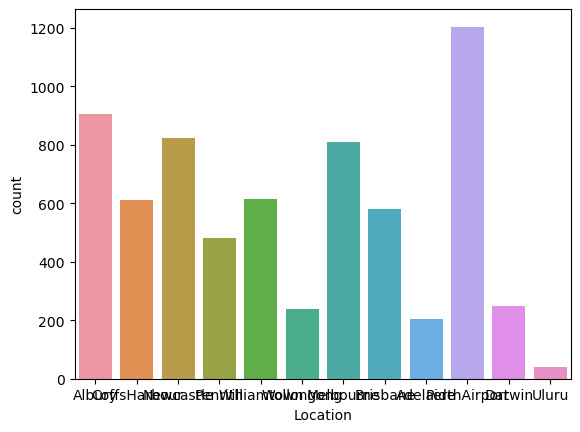

In [124]:
# Univariate Analysis

sns.countplot(x = 'Location', data = rainfall_weather_df)
print(rainfall_weather_df.Location.value_counts())

Observation:
            1. more number of rainfall in the location - PerthAirport  1204

N      1401
E       518
SW      465
W       434
WSW     420
WNW     398
SSE     390
S       376
SE      370
ENE     357
NE      300
SSW     299
NW      296
NNE     287
ESE     267
NNW     184
Name: WindGustDir, dtype: int64


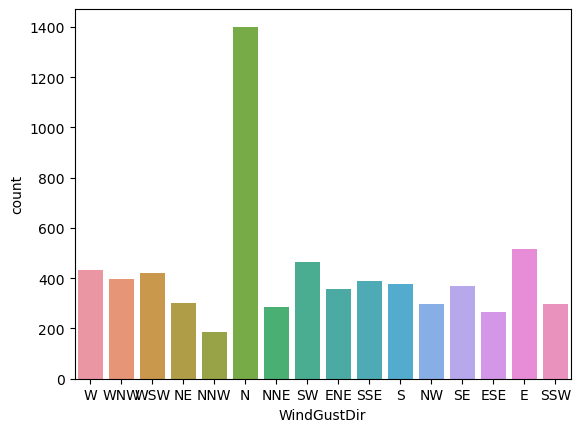

In [125]:
# Univariate Analysis

sns.countplot(x = 'WindGustDir', data = rainfall_weather_df)
print(rainfall_weather_df.WindGustDir.value_counts())

Observation:
            1. more number of rainfall in the direction of the strongest wind gust in the 24 hours to 
               midnight - North - 1401

N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64


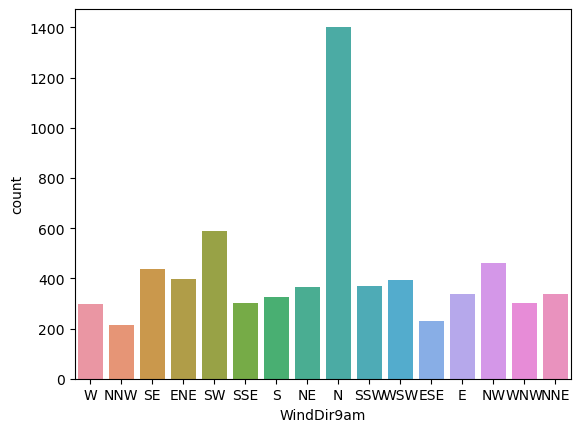

In [126]:
# Univariate Analysis

sns.countplot(x = 'WindDir9am', data = rainfall_weather_df)
print(rainfall_weather_df.WindDir9am.value_counts())

Observation:
            1. more number of rainfall in the Direction of the wind at 9am - North - 1403

SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64


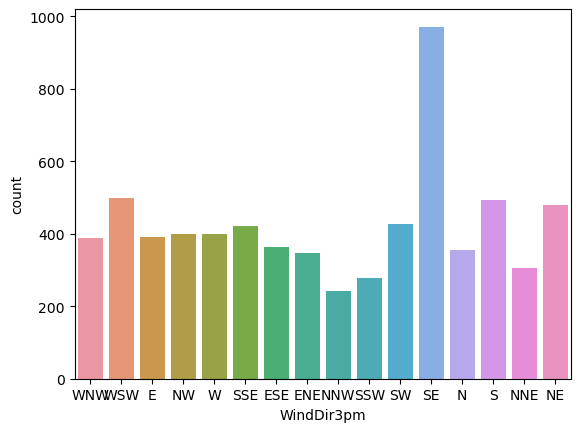

In [127]:
# Univariate Analysis

sns.countplot(x = 'WindDir3pm', data = rainfall_weather_df)
print(rainfall_weather_df.WindDir3pm.value_counts())

Observation:
            1. more number of rainfall in the Direction of the wind at 3pm - South East - 971

No     5190
Yes    1572
Name: RainTomorrow, dtype: int64


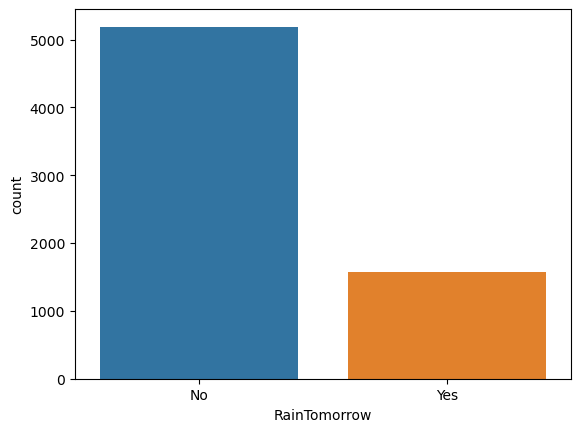

In [128]:
# Univariate Analysis

sns.countplot(x = 'RainTomorrow', data = rainfall_weather_df)
print(rainfall_weather_df.RainTomorrow.value_counts())

Observation:
            1. Rainfall Tomorrrow - No - 5190
            2. Data is imbalanced, need to do data balancing.

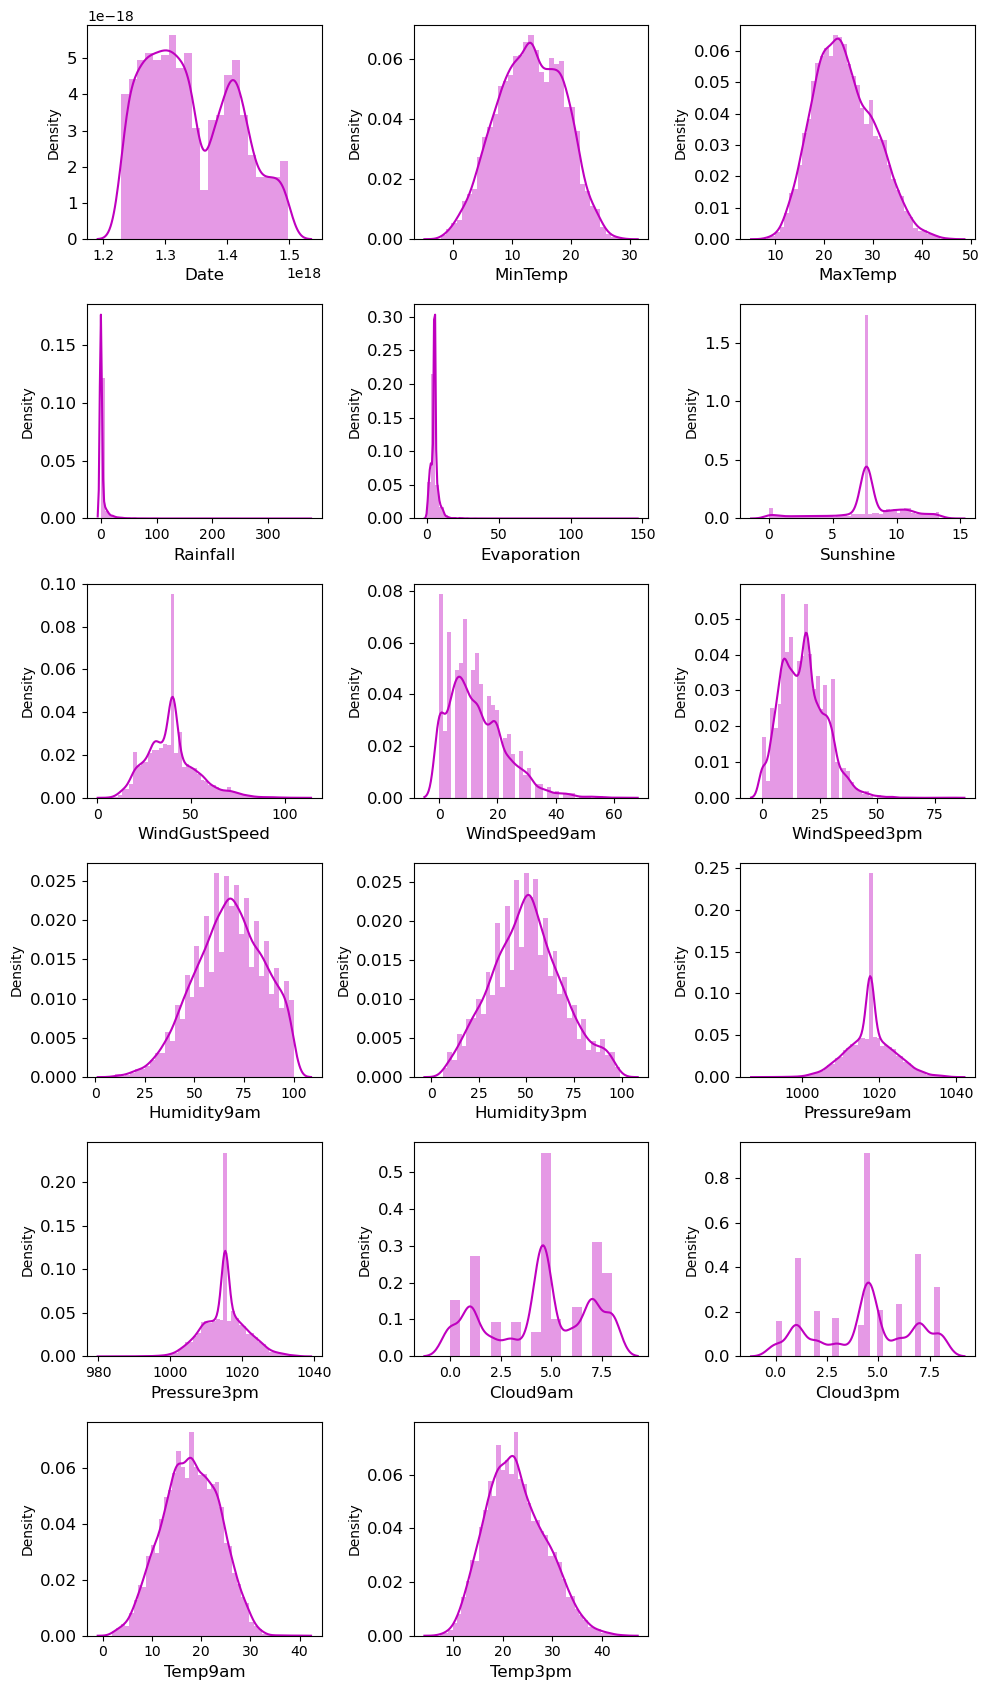

In [129]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(10, 17))
p = 1
for i in num_col:
    if p <= 17:
        ax = plt.subplot(6, 3, p)
        sns.distplot(rainfall_weather_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. The continuous data are not well normally distributed. 
            2. There are outliers
            3. We need to deal with skewness in the data 

In [239]:
rainfall_weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [240]:
rainfall_weather_df.shape

(6762, 22)

In [241]:
rainfall_weather_df.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           332
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainTomorrow        2
dtype: int64

## Feature Encoding

In [242]:
# Convert Object data type to int type

rainfall_weather_df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainTomorrow             object
dtype: object

In [243]:
rainfall_weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [244]:
cat_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']

In [245]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [246]:
for i in cat_col:
    rainfall_weather_df[i] = label_enc.fit_transform(rainfall_weather_df[i])

In [247]:
rainfall_weather_df.dtypes

Date             datetime64[ns]
Location                  int32
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int32
WindGustSpeed           float64
WindDir9am                int32
WindDir3pm                int32
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainTomorrow              int32
dtype: object

Observation:
            1. Converted all Object data type to int type

## Check for Multicollinearity

In [248]:
# get coefficient of one variable with all the other variables

cor = rainfall_weather_df.corr()
cor

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.090453  0.070832 -0.003490     0.138154  0.064514   
MinTemp        0.090453  1.000000  0.728063  0.092439     0.267755  0.047933   
MaxTemp        0.070832  0.728063  1.000000 -0.087620     0.345830  0.361249   
Rainfall      -0.003490  0.092439 -0.087620  1.000000    -0.000275 -0.190437   
Evaporation    0.138154  0.267755  0.345830 -0.000275     1.000000  0.262840   
Sunshine       0.064514  0.047933  0.361249 -0.190437     0.262840  1.000000   
WindGustDir   -0.074300 -0.150774 -0.217567  0.036672    -0.096780 -0.106207   
WindGustSpeed  0.262774  0.242375  0.164883  0.090857     0.162834  0.013039   
WindDir9am    -0.088884 -0.020875 -0.192523  0.091665    -0.083373 -0.079388   
WindDir3pm    -0.001275 -0.139535 -0.160997  0.032055    -0.036496 -0.055797   
WindSpeed9am   0.240984  0.169559  0.056748  0.051985     0.129189  0.024077   
WindSpeed3pm   0.230088  0.187798  0.115482  0.022619     0.110119  0.059477   
Humidity9am   -0.033612 -0.154224 -0.425012  0.228657    -0.242224 -0.388966   
Humidity3pm   -0.001340  0.067502 -0.430741  0.243354    -0.189347 -0.446497   
Pressure9am   -0.037507 -0.441325 -0.337877 -0.073020    -0.201735 -0.003533   
Pressure3pm   -0.023255 -0.440888 -0.413459 -0.034082    -0.216361 -0.059875   
Cloud9am      -0.011615  0.087812 -0.246427  0.193093    -0.072151 -0.551186   
Cloud3pm      -0.013584  0.040742 -0.243364  0.160200    -0.119730 -0.568954   
Temp9am        0.098478  0.891401  0.866615 -0.004171     0.314590  0.246864   
Temp3pm        0.066192  0.696614  0.974843 -0.091945     0.338812  0.379144   
RainTomorrow  -0.004506  0.097171 -0.160218  0.224217    -0.076600 -0.345379   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.074300       0.262774   -0.088884   -0.001275  ...   
MinTemp          -0.150774       0.242375   -0.020875   -0.139535  ...   
MaxTemp          -0.217567       0.164883   -0.192523   -0.160997  ...   
Rainfall          0.036672       0.090857    0.091665    0.032055  ...   
Evaporation      -0.096780       0.162834   -0.083373   -0.036496  ...   
Sunshine         -0.106207       0.013039   -0.079388   -0.055797  ...   
WindGustDir       1.000000       0.000480    0.385221    0.502140  ...   
WindGustSpeed     0.000480       1.000000   -0.075987    0.078794  ...   
WindDir9am        0.385221      -0.075987    1.000000    0.216648  ...   
WindDir3pm        0.502140       0.078794    0.216648    1.000000  ...   
WindSpeed9am      0.015291       0.584105    0.056413    0.010819  ...   
WindSpeed3pm      0.106009       0.615217    0.044693    0.085263  ...   
Humidity9am       0.040937      -0.265362    0.015462   -0.005558  ...   
Humidity3pm       0.048025      -0.092423    0.126407   -0.009464  ...   
Pressure9am      -0.110879      -0.394086   -0.027671   -0.139020  ...   
Pressure3pm      -0.029383      -0.363669    0.050710   -0.049299  ...   
Cloud9am          0.121621       0.007703    0.079419    0.072567  ...   
Cloud3pm          0.088311       0.053480    0.058235    0.052121  ...   
Temp9am          -0.171100       0.221060   -0.070937   -0.146479  ...   
Temp3pm          -0.231060       0.129193   -0.200949   -0.175048  ...   
RainTomorrow      0.048487       0.184221    0.040399    0.004301  ...   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Location           0.230088    -0.033612    -0.001340    -0.037507   
MinTemp            0.187798    -0.154224     0.067502    -0.441325   
MaxTemp            0.115482    -0.425012    -0.430741    -0.337877   
Rainfall           0.022619     0.228657     0.243354    -0.073020   
Evaporation        0.110119    -0.242224    -0.189347    -0.201735   
Sunshine           0.059477    -0.388966    -0.446497    -0.003533   
WindGustDir        0.106009     0.040937     0.048025    -0.110879   
WindGustSpeed      0.615217    -0.265362    -0.092423    -0.39408

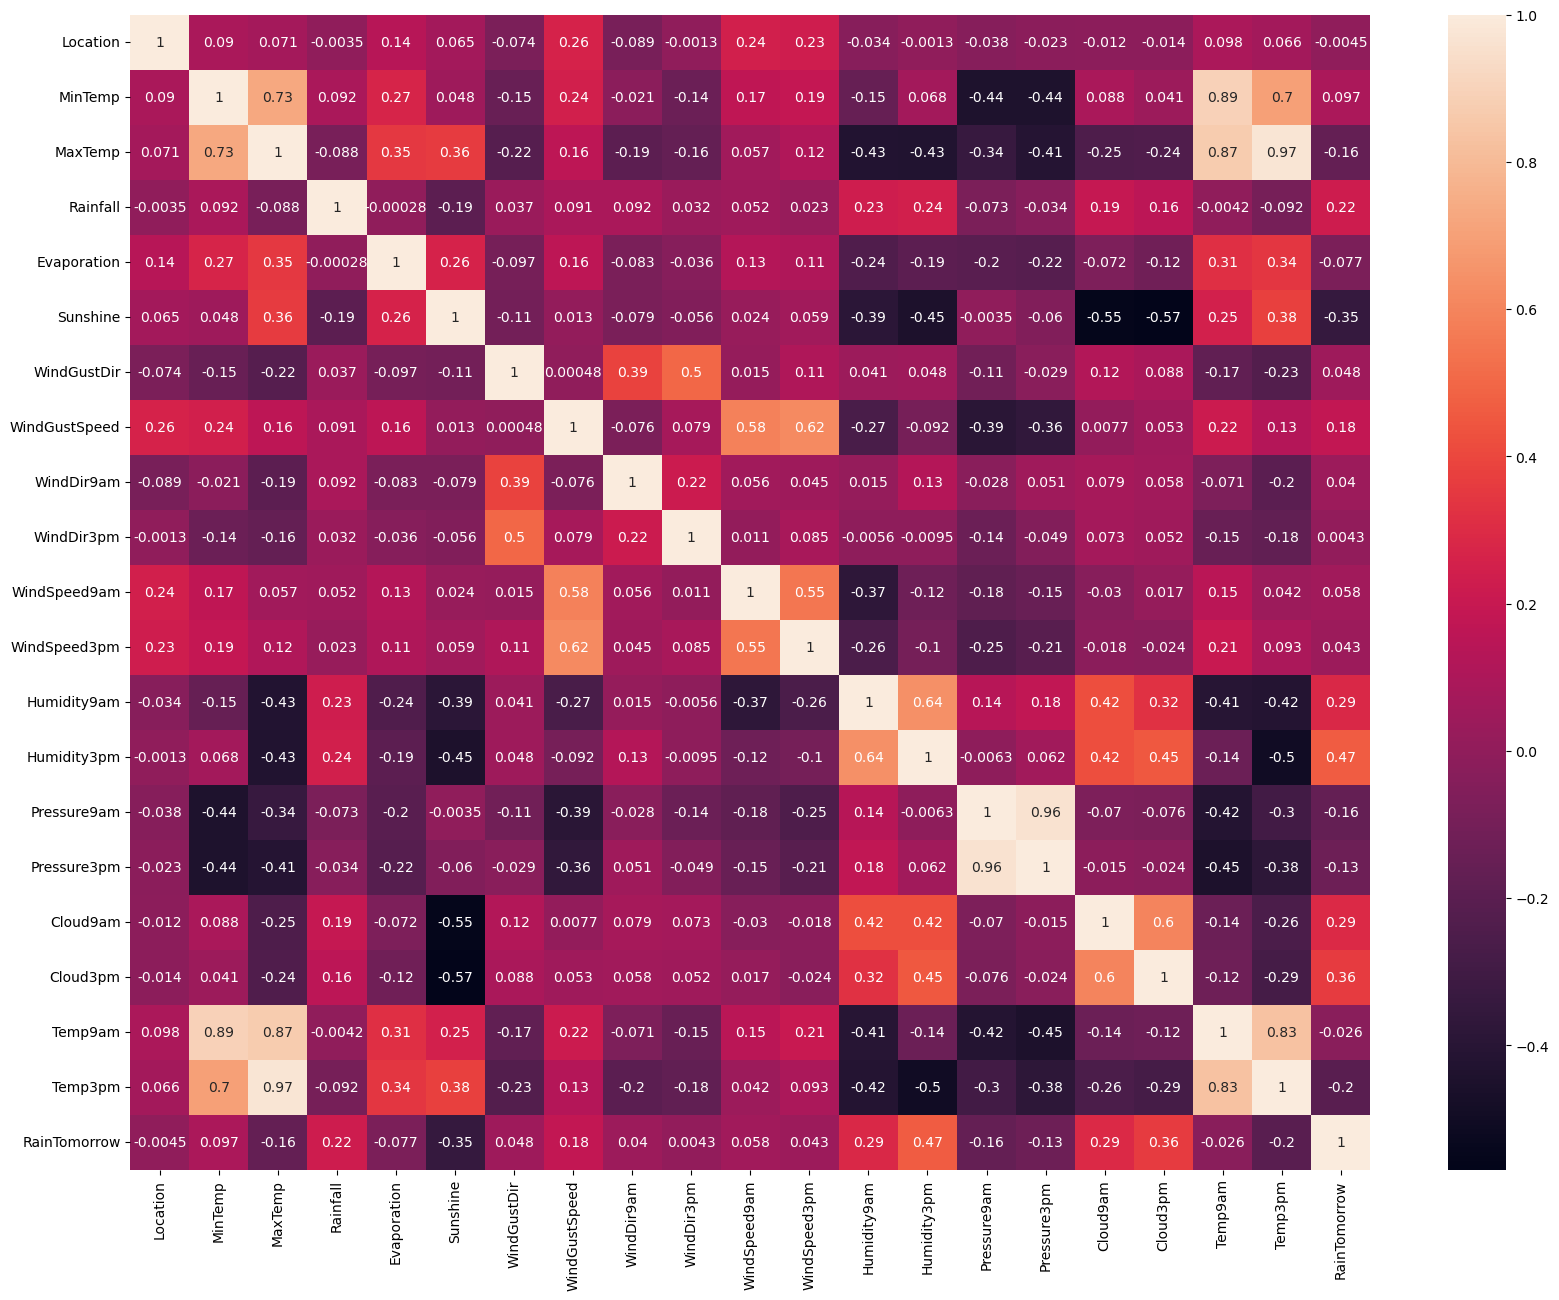

In [249]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'MaxTemp' v/s 'Temp3pm' has more positive correlation 
                0.97. This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

In [250]:
rainfall_weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

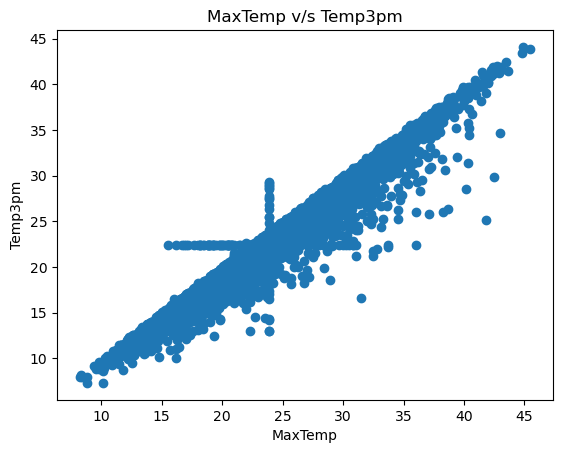

In [251]:
# one more proof so will plot scatter plot and check

plt.scatter(rainfall_weather_df['MaxTemp'], rainfall_weather_df.Temp3pm)
plt.xlabel("MaxTemp")
plt.ylabel("Temp3pm")
plt.title("MaxTemp v/s Temp3pm")
plt.show()

Observation:
            1. feature v/s feature - 'MaxTemp' v/s 'Temp3pm' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'MaxTemp' increases 'Temp3pm' value increases - positive correlation

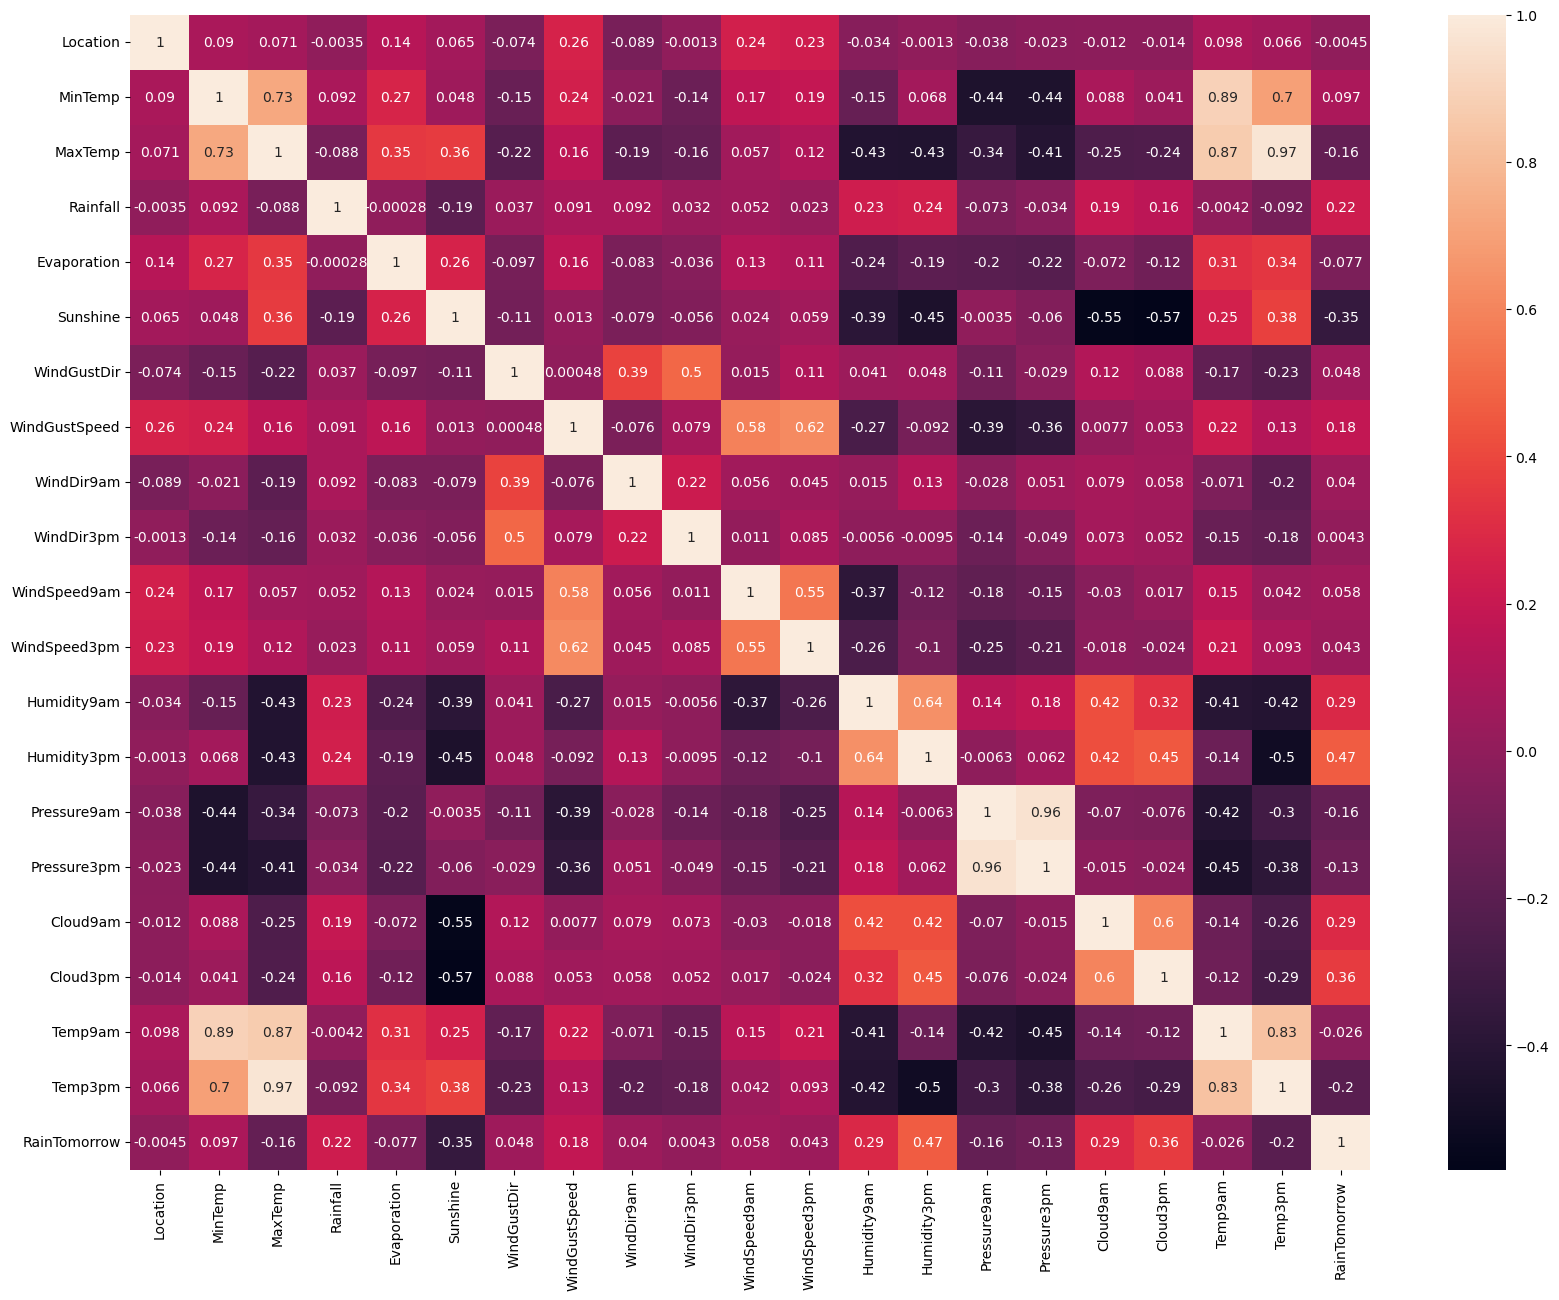

In [252]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [ ]:
Observation:
            1. feature v/s label - 'MaxTemp' v/s 'RainTomorrow' is -0.160218 and 'Temp3pm' v/s 
               'RainTomorrow' is -0.202900 from this heatmap 
                we get to know 'MaxTemp' is contributing more to 'RainTomorrow' than 
                'Temp3pm'. so we can remove 'Temp3pm' feature. 

In [253]:
rainfall_weather_df.drop(['Temp3pm'], axis = 1, inplace = True)

In [254]:
rainfall_weather_df.shape

(6762, 21)

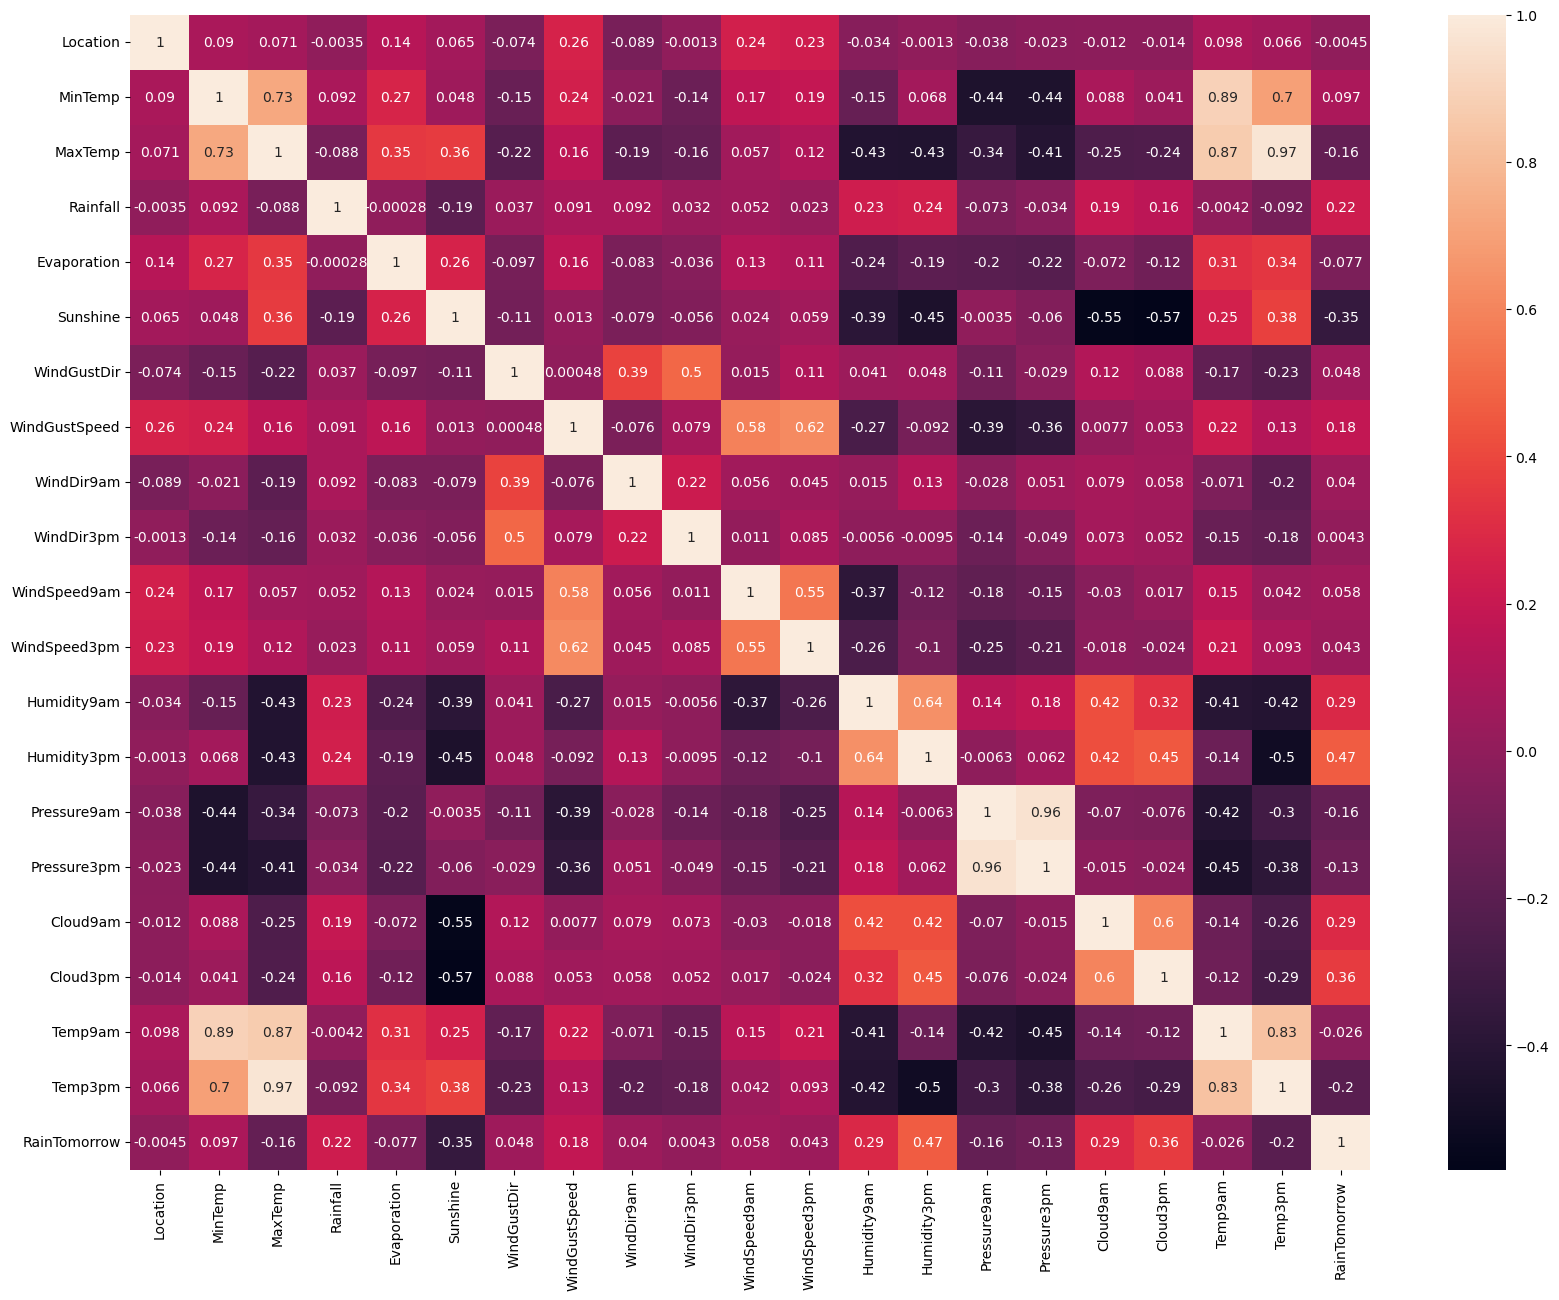

In [255]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'MaxTemp' v/s 'Temp9am' has more positive correlation 
                0.87. This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

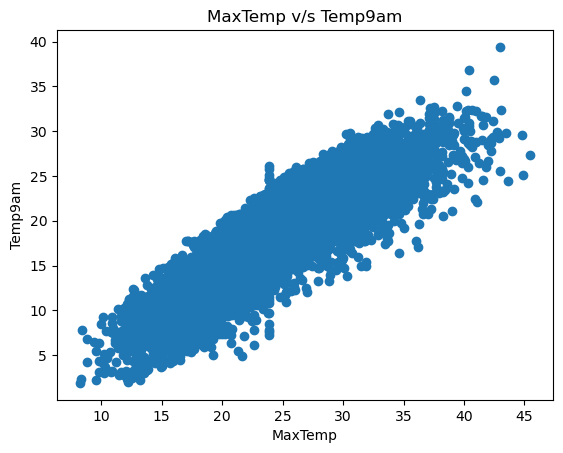

In [256]:
# one more proof so will plot scatter plot and check

plt.scatter(rainfall_weather_df['MaxTemp'], rainfall_weather_df.Temp9am)
plt.xlabel("MaxTemp")
plt.ylabel("Temp9am")
plt.title("MaxTemp v/s Temp9am")
plt.show()

Observation:
            1. feature v/s feature - 'MaxTemp' v/s 'Temp9am' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'MaxTemp' increases 'Temp9am' value increases - positive correlation

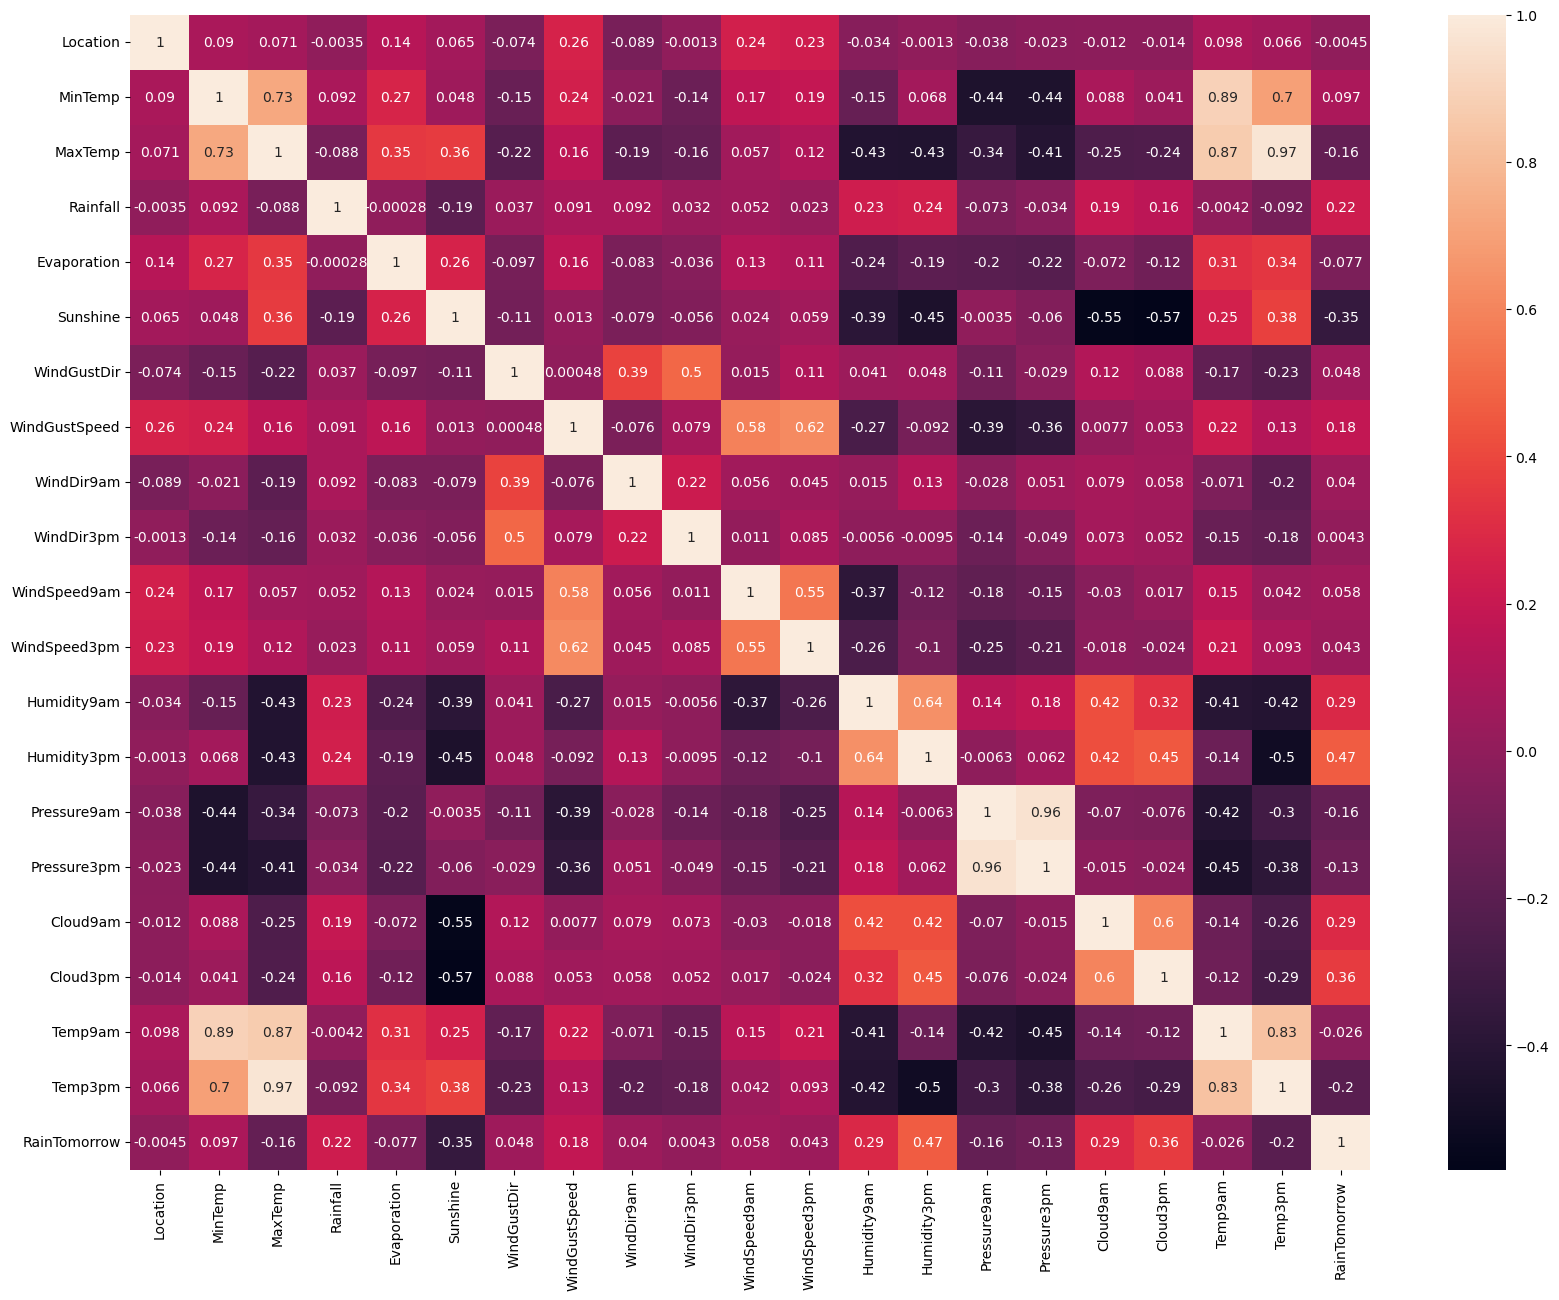

In [257]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [ ]:
Observation:
            1. feature v/s label - 'MaxTemp' v/s 'RainTomorrow' is -0.160218 and 'Temp9am' v/s 
               'RainTomorrow' is -0.025813 from this heatmap 
                we get to know 'MaxTemp' is contributing less to 'RainTomorrow' than 
                'Temp9am'. so we can remove 'MaxTemp' feature. 

In [258]:
rainfall_weather_df.drop(['MaxTemp'], axis = 1, inplace = True)

In [259]:
rainfall_weather_df.shape

(6762, 20)

## Not used

## Another way to choose the best feature

In [183]:
from sklearn.feature_selection import SelectKBest, f_classif

In [184]:
# Seperate features and labels

x = rainfall_weather_df.drop(['Date', 'RainTomorrow'], axis = 1)
y = rainfall_weather_df.RainTomorrow

In [185]:
x.shape

(6762, 20)

In [186]:
y.shape

(6762,)

In [187]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6757    0
6758    0
6759    0
6760    0
6761    0
Name: RainTomorrow, Length: 6762, dtype: int32

In [188]:
best_features = SelectKBest(score_func = f_classif, k = 10)

In [189]:
fit = best_features.fit(x, y)

In [190]:
df_scores = pd.DataFrame(fit.scores_)
df_scores

0
0      0.137258
1     64.437249
2    178.099295
3    357.838055
4     39.898378
5    915.595912
6     15.930374
7    237.476895
8     11.050703
9      0.125069
10    22.837813
11    12.630889
12   610.469063
13  1882.906798
14   175.547276
15   119.293900
16   640.427562
17   985.940444
18     4.507377
19   290.248818

In [191]:
df_columns = pd.DataFrame(x.columns)
df_columns

0
0        Location
1         MinTemp
2         MaxTemp
3        Rainfall
4     Evaporation
5        Sunshine
6     WindGustDir
7   WindGustSpeed
8      WindDir9am
9      WindDir3pm
10   WindSpeed9am
11   WindSpeed3pm
12    Humidity9am
13    Humidity3pm
14    Pressure9am
15    Pressure3pm
16       Cloud9am
17       Cloud3pm
18        Temp9am
19        Temp3pm

In [192]:
# Concatenate DataFrames

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_Name', 'Score']

In [193]:
# prints features scores

feature_scores.nlargest(20, 'Score') 

Feature_Name        Score
13    Humidity3pm  1882.906798
17       Cloud3pm   985.940444
5        Sunshine   915.595912
16       Cloud9am   640.427562
12    Humidity9am   610.469063
3        Rainfall   357.838055
19        Temp3pm   290.248818
7   WindGustSpeed   237.476895
2         MaxTemp   178.099295
14    Pressure9am   175.547276
15    Pressure3pm   119.293900
1         MinTemp    64.437249
4     Evaporation    39.898378
10   WindSpeed9am    22.837813
6     WindGustDir    15.930374
11   WindSpeed3pm    12.630889
8      WindDir9am    11.050703
18        Temp9am     4.507377
0        Location     0.137258
9      WindDir3pm     0.125069

In [194]:
# prints 10 best features

feature_scores.nlargest(13, 'Score') 

Feature_Name        Score
13    Humidity3pm  1882.906798
17       Cloud3pm   985.940444
5        Sunshine   915.595912
16       Cloud9am   640.427562
12    Humidity9am   610.469063
3        Rainfall   357.838055
19        Temp3pm   290.248818
7   WindGustSpeed   237.476895
2         MaxTemp   178.099295
14    Pressure9am   175.547276
15    Pressure3pm   119.293900
1         MinTemp    64.437249
4     Evaporation    39.898378

In [195]:
rainfall_weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [196]:
rainfall_weather_df.shape

(6762, 22)

In [199]:
rainfall_weather_df1 = rainfall_weather_df.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Temp9am'], axis = 1)

In [200]:
rainfall_weather_df1.shape

(6762, 15)

In [201]:
rainfall_weather_df1.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainTomorrow'],
      dtype='object')

Observation:
            1. We have selected 13 best features and Date and Label we have retained it

## Checking Outliers

In [260]:
rainfall_weather_df.columns

Index(['Date', 'Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'RainTomorrow'],
      dtype='object')

In [261]:
cat_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow']

In [262]:
# remove dates and categorical columns

rainfall_weather_df_features = rainfall_weather_df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainTomorrow'], axis = 1)

In [263]:
rainfall_weather_df_features.head()

MinTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     13.4       0.6     5.389395  7.632205           44.0          20.0   
1      7.4       0.0     5.389395  7.632205           44.0           4.0   
2     12.9       0.0     5.389395  7.632205           46.0          19.0   
3      9.2       0.0     5.389395  7.632205           24.0          11.0   
4     17.5       1.0     5.389395  7.632205           41.0           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1  8.000000   
1          22.0         44.0         25.0       1010.6       1007.8  4.566622   
2          26.0         38.0         30.0       1007.6       1008.7  4.566622   
3           9.0         45.0         16.0       1017.6       1012.8  4.566622   
4          20.0         82.0         33.0       1010.8       1006.0  7.000000   

   Cloud3pm  Temp9am  
0  4.503183     16.9  
1  4.503183     17.2  
2  2.000000     21.0  
3  4.503183     18.1  
4  8.000000     17.8

In [264]:
rainfall_weather_df_features.shape

(6762, 14)

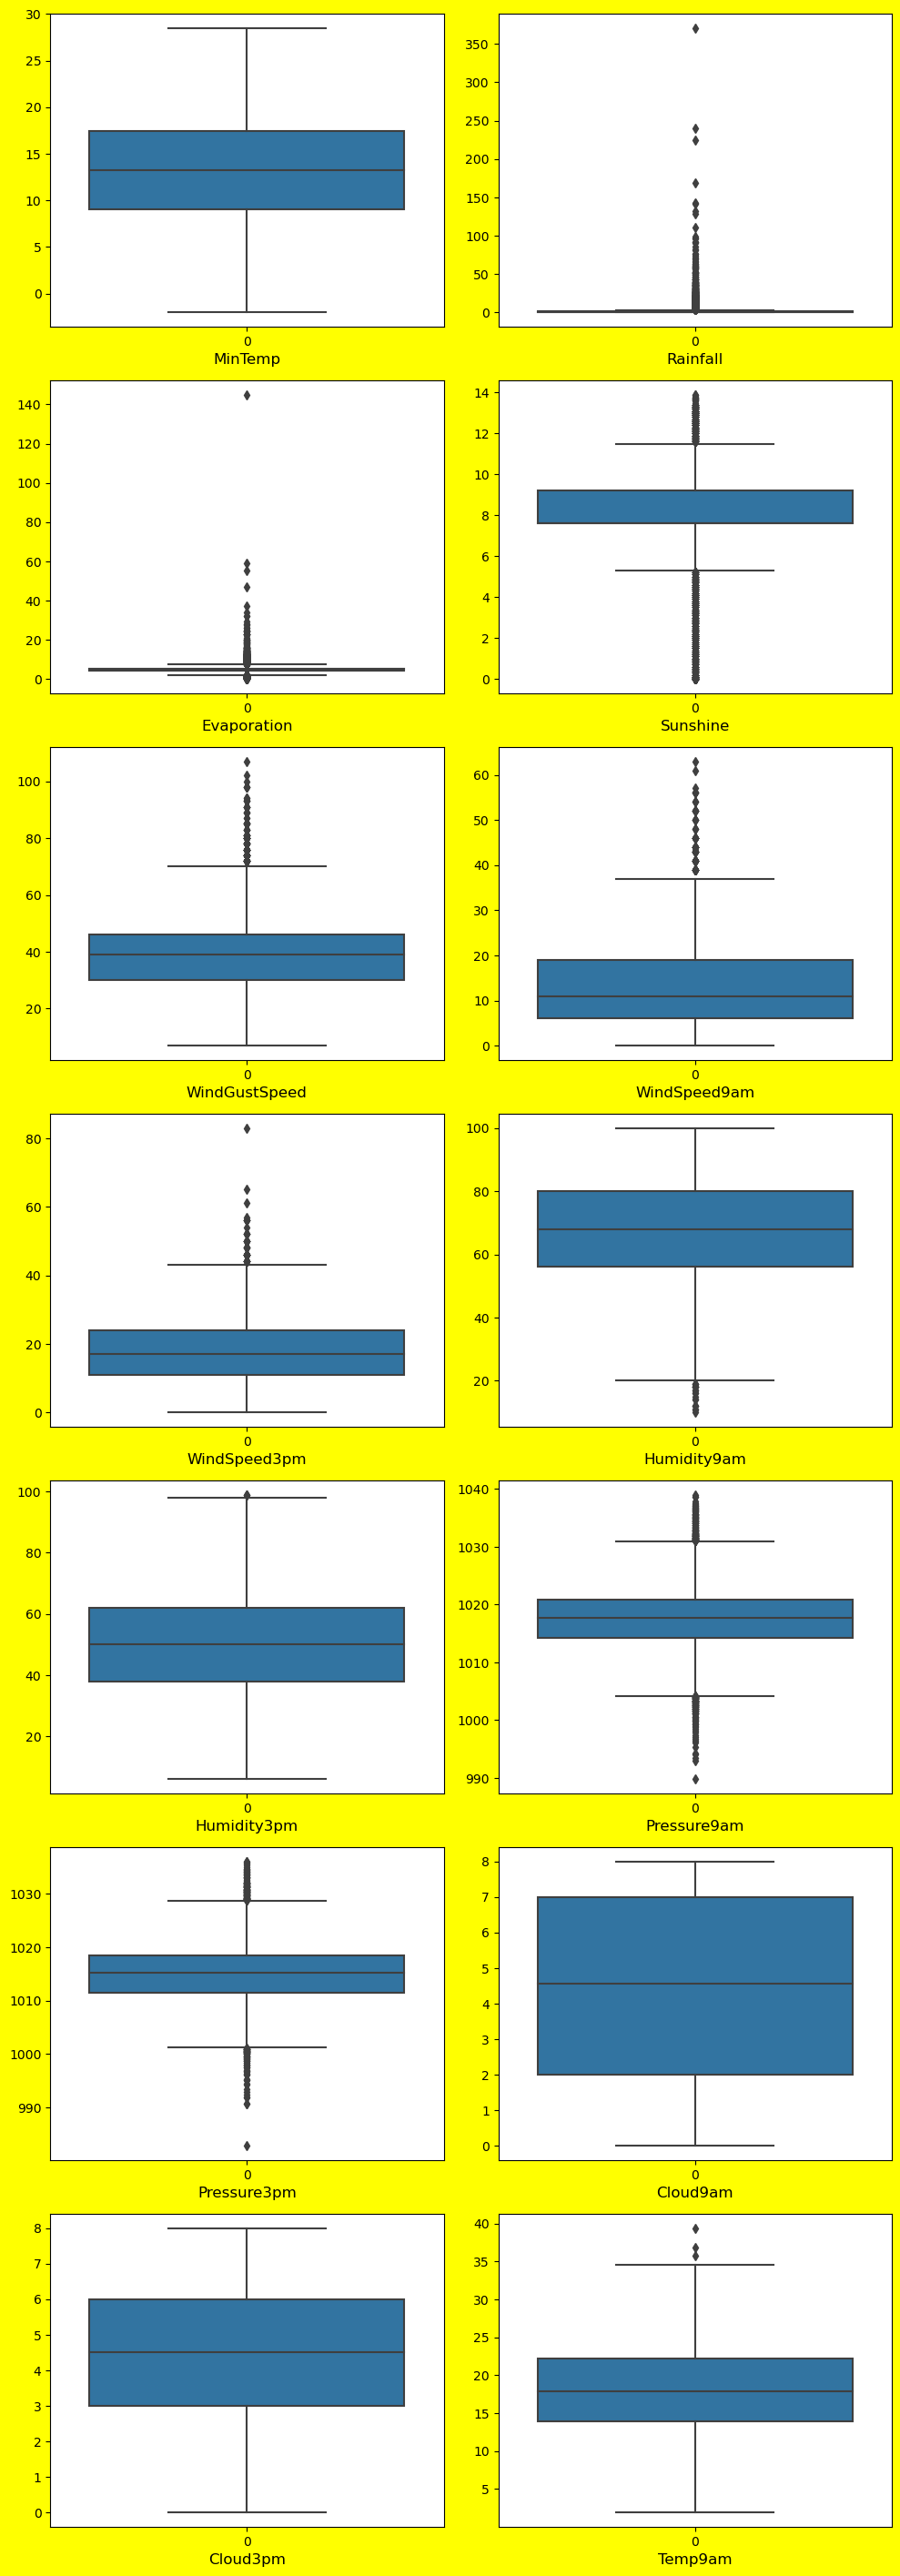

In [265]:
# Visualize the outliers using boxplot

plt.figure(figsize = (10, 32), facecolor = 'yellow')
p = 1
for i in rainfall_weather_df_features:
    if p <= 14:
        ax = plt.subplot(8, 2, p)
        sns.boxplot(data = rainfall_weather_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. Outliers found in the most of the numerical features. 
            2. remove outliers from 'Temp3pm'

In [266]:
rainfall_weather_df_features.shape

(6762, 14)

## Find IQR to identify outliers and remove it

In [267]:
rainfall_weather_df_features.columns

Index(['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am'],
      dtype='object')

In [268]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = rainfall_weather_df.quantile(0.25)
q3 = rainfall_weather_df.quantile(0.75)
iqr = q3 - q1

In [269]:
# validating one outlier

WindSpeed3pm_high = (q3['WindSpeed3pm'] + (1.5 * iqr['WindSpeed3pm']))
WindSpeed3pm_high

# anything > 43.5 outliers

43.5

In [270]:
# check the index which have the higher values

np_index = np.where(rainfall_weather_df['WindSpeed3pm'] > WindSpeed3pm_high)
np_index

# remove these indexes as they are outliers

(array([  52,  356,  381,  980, 1114, 1168, 1189, 1216, 1587, 1627, 1638,
        1641, 1644, 1665, 1666, 1681, 1898, 1903, 2028, 2043, 2069, 2219,
        2230, 2281, 2302, 3025, 3042, 3055, 3067, 3082, 3099, 3141, 3153,
        3172, 3212, 3325, 3445, 3458, 3471, 3480, 3617, 3671, 3697, 3786,
        3946, 3981, 3991, 4002, 4034, 4071, 4170, 4223, 4336, 4350, 4355,
        4360, 4362, 4442, 5499, 5533, 5970], dtype=int64),)

In [271]:
rainfall_weather_df.shape

(6762, 20)

In [272]:
rainfall_weather_df = rainfall_weather_df.drop(rainfall_weather_df.index[np_index])

In [273]:
rainfall_weather_df.shape  # 29 rows removed - outliers

(6701, 20)

In [274]:
rainfall_weather_df

Date  Location  MinTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01         1     13.4       0.6     5.389395  7.632205   
1    2008-12-02         1      7.4       0.0     5.389395  7.632205   
2    2008-12-03         1     12.9       0.0     5.389395  7.632205   
3    2008-12-04         1      9.2       0.0     5.389395  7.632205   
4    2008-12-05         1     17.5       1.0     5.389395  7.632205   
...         ...       ...      ...       ...          ...       ...   
6757 2017-06-21         9      2.8       0.0     5.389395  7.632205   
6758 2017-06-22         9      3.6       0.0     5.389395  7.632205   
6759 2017-06-23         9      5.4       0.0     5.389395  7.632205   
6760 2017-06-24         9      7.8       0.0     5.389395  7.632205   
6761 2017-06-25         9     14.9       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              13      44.000000          13          14          20.0   
1              14      44.000000           6          15           4.0   
2              15      46.000000          13          15          19.0   
3               4      24.000000           9           0          11.0   
4              13      41.000000           1           7           7.0   
...           ...            ...         ...         ...           ...   
6757            0      31.000000           9           1          13.0   
6758            6      22.000000           9           3          13.0   
6759            3      37.000000           9          14           9.0   
6760            9      28.000000          10           3          13.0   
6761            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
6757          11.0         51.0         24.0       1024.6       1020.3   
6758           9.0         56.0         21.0       1023.5       1019.1   
6759           9.0         53.0         24.0       1021.0       1016.8   
6760           7.0         51.0         24.0       1019.4       1016.5   
6761          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  RainTomorrow  
0     8.000000  4.503183     16.9             0  
1     4.566622  4.503183     17.2             0  
2     4.566622  2.000000     21.0             0  
3     4.566622  4.503183     18.1             0  
4     7.000000  8.000000     17.8             0  
...        ...       ...      ...           ...  
6757  4.566622  4.503183     10.1             0  
6758  4.566622  4.503183     10.9             0  
6759  4.566622  4.503183     12.5             0  
6760  3.000000  2.000000     15.1             0  
6761  8.000000  8.000000     15.0             0  

[6701 rows x 20 columns]

In [275]:
rainfall_weather_df.reset_index(inplace = True, drop = True)

In [276]:
rainfall_weather_df

Date  Location  MinTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01         1     13.4       0.6     5.389395  7.632205   
1    2008-12-02         1      7.4       0.0     5.389395  7.632205   
2    2008-12-03         1     12.9       0.0     5.389395  7.632205   
3    2008-12-04         1      9.2       0.0     5.389395  7.632205   
4    2008-12-05         1     17.5       1.0     5.389395  7.632205   
...         ...       ...      ...       ...          ...       ...   
6696 2017-06-21         9      2.8       0.0     5.389395  7.632205   
6697 2017-06-22         9      3.6       0.0     5.389395  7.632205   
6698 2017-06-23         9      5.4       0.0     5.389395  7.632205   
6699 2017-06-24         9      7.8       0.0     5.389395  7.632205   
6700 2017-06-25         9     14.9       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              13      44.000000          13          14          20.0   
1              14      44.000000           6          15           4.0   
2              15      46.000000          13          15          19.0   
3               4      24.000000           9           0          11.0   
4              13      41.000000           1           7           7.0   
...           ...            ...         ...         ...           ...   
6696            0      31.000000           9           1          13.0   
6697            6      22.000000           9           3          13.0   
6698            3      37.000000           9          14           9.0   
6699            9      28.000000          10           3          13.0   
6700            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
6696          11.0         51.0         24.0       1024.6       1020.3   
6697           9.0         56.0         21.0       1023.5       1019.1   
6698           9.0         53.0         24.0       1021.0       1016.8   
6699           7.0         51.0         24.0       1019.4       1016.5   
6700          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  RainTomorrow  
0     8.000000  4.503183     16.9             0  
1     4.566622  4.503183     17.2             0  
2     4.566622  2.000000     21.0             0  
3     4.566622  4.503183     18.1             0  
4     7.000000  8.000000     17.8             0  
...        ...       ...      ...           ...  
6696  4.566622  4.503183     10.1             0  
6697  4.566622  4.503183     10.9             0  
6698  4.566622  4.503183     12.5             0  
6699  3.000000  2.000000     15.1             0  
6700  8.000000  8.000000     15.0             0  

[6701 rows x 20 columns]

In [277]:
rainfall_weather_df.shape

(6701, 20)

In [278]:
# Validating another outlier

q1 = rainfall_weather_df.quantile(0.25)
q3 = rainfall_weather_df.quantile(0.75)
iqr = q3 - q1

In [279]:
WindGustSpeed_high = (q3['WindGustSpeed'] + (1.5 * iqr['WindGustSpeed']))
WindGustSpeed_high

# anything > 70.0 outliers

70.0

In [280]:
# check the index which have the higher values

np_index1 = np.where(rainfall_weather_df['WindGustSpeed'] > WindGustSpeed_high)
np_index1

# remove these indexes as they are outliers

(array([   8,   61,  122,  210,  266,  353,  358,  404,  560,  640,  744,
         792,  946,  976, 1174, 1410, 2350, 2354, 2448, 2475, 2480, 2495,
        2503, 2534, 2549, 2834, 2875, 2883, 2890, 3025, 3038, 3039, 3041,
        3058, 3059, 3072, 3080, 3123, 3124, 3138, 3170, 3173, 3199, 3243,
        3273, 3313, 3412, 3413, 3442, 3451, 3469, 3543, 3544, 3562, 3563,
        3569, 3586, 3587, 3629, 3633, 3635, 3636, 3641, 3670, 3671, 3712,
        3753, 3761, 3762, 3764, 3776, 3812, 3835, 3879, 3890, 3891, 3924,
        3939, 3951, 3955, 3959, 3991, 4017, 4054, 4058, 4070, 4077, 4084,
        4135, 4209, 4222, 4223, 4224, 4253, 4265, 4267, 4284, 4286, 4298,
        4334, 4355, 4367, 4391, 4408, 4413, 4414, 5022, 5026, 5038, 5060,
        5100, 5127, 5211, 5231, 5233, 5234, 5238, 5239, 5281, 5318, 5324,
        5332, 5333, 5423, 5446, 5514, 5580, 5581, 5606, 5739, 5740, 5741,
        5742, 5824, 5825, 5842, 5847, 6011, 6080, 6090, 6110, 6129, 6137,
        6140, 6142, 6148, 6149, 6179, 

In [281]:
rainfall_weather_df.shape

(6701, 20)

In [282]:
rainfall_weather_df = rainfall_weather_df.drop(rainfall_weather_df.index[np_index1])

In [283]:
rainfall_weather_df.shape  # 62 rows removed - outliers

(6547, 20)

In [284]:
rainfall_weather_df

Date  Location  MinTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01         1     13.4       0.6     5.389395  7.632205   
1    2008-12-02         1      7.4       0.0     5.389395  7.632205   
2    2008-12-03         1     12.9       0.0     5.389395  7.632205   
3    2008-12-04         1      9.2       0.0     5.389395  7.632205   
4    2008-12-05         1     17.5       1.0     5.389395  7.632205   
...         ...       ...      ...       ...          ...       ...   
6696 2017-06-21         9      2.8       0.0     5.389395  7.632205   
6697 2017-06-22         9      3.6       0.0     5.389395  7.632205   
6698 2017-06-23         9      5.4       0.0     5.389395  7.632205   
6699 2017-06-24         9      7.8       0.0     5.389395  7.632205   
6700 2017-06-25         9     14.9       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              13      44.000000          13          14          20.0   
1              14      44.000000           6          15           4.0   
2              15      46.000000          13          15          19.0   
3               4      24.000000           9           0          11.0   
4              13      41.000000           1           7           7.0   
...           ...            ...         ...         ...           ...   
6696            0      31.000000           9           1          13.0   
6697            6      22.000000           9           3          13.0   
6698            3      37.000000           9          14           9.0   
6699            9      28.000000          10           3          13.0   
6700            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
6696          11.0         51.0         24.0       1024.6       1020.3   
6697           9.0         56.0         21.0       1023.5       1019.1   
6698           9.0         53.0         24.0       1021.0       1016.8   
6699           7.0         51.0         24.0       1019.4       1016.5   
6700          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  RainTomorrow  
0     8.000000  4.503183     16.9             0  
1     4.566622  4.503183     17.2             0  
2     4.566622  2.000000     21.0             0  
3     4.566622  4.503183     18.1             0  
4     7.000000  8.000000     17.8             0  
...        ...       ...      ...           ...  
6696  4.566622  4.503183     10.1             0  
6697  4.566622  4.503183     10.9             0  
6698  4.566622  4.503183     12.5             0  
6699  3.000000  2.000000     15.1             0  
6700  8.000000  8.000000     15.0             0  

[6547 rows x 20 columns]

In [285]:
rainfall_weather_df.reset_index(inplace = True, drop = True)

In [286]:
rainfall_weather_df

Date  Location  MinTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01         1     13.4       0.6     5.389395  7.632205   
1    2008-12-02         1      7.4       0.0     5.389395  7.632205   
2    2008-12-03         1     12.9       0.0     5.389395  7.632205   
3    2008-12-04         1      9.2       0.0     5.389395  7.632205   
4    2008-12-05         1     17.5       1.0     5.389395  7.632205   
...         ...       ...      ...       ...          ...       ...   
6542 2017-06-21         9      2.8       0.0     5.389395  7.632205   
6543 2017-06-22         9      3.6       0.0     5.389395  7.632205   
6544 2017-06-23         9      5.4       0.0     5.389395  7.632205   
6545 2017-06-24         9      7.8       0.0     5.389395  7.632205   
6546 2017-06-25         9     14.9       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              13      44.000000          13          14          20.0   
1              14      44.000000           6          15           4.0   
2              15      46.000000          13          15          19.0   
3               4      24.000000           9           0          11.0   
4              13      41.000000           1           7           7.0   
...           ...            ...         ...         ...           ...   
6542            0      31.000000           9           1          13.0   
6543            6      22.000000           9           3          13.0   
6544            3      37.000000           9          14           9.0   
6545            9      28.000000          10           3          13.0   
6546            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
6542          11.0         51.0         24.0       1024.6       1020.3   
6543           9.0         56.0         21.0       1023.5       1019.1   
6544           9.0         53.0         24.0       1021.0       1016.8   
6545           7.0         51.0         24.0       1019.4       1016.5   
6546          17.0         62.0         36.0       1020.2       1017.9   

      Cloud9am  Cloud3pm  Temp9am  RainTomorrow  
0     8.000000  4.503183     16.9             0  
1     4.566622  4.503183     17.2             0  
2     4.566622  2.000000     21.0             0  
3     4.566622  4.503183     18.1             0  
4     7.000000  8.000000     17.8             0  
...        ...       ...      ...           ...  
6542  4.566622  4.503183     10.1             0  
6543  4.566622  4.503183     10.9             0  
6544  4.566622  4.503183     12.5             0  
6545  3.000000  2.000000     15.1             0  
6546  8.000000  8.000000     15.0             0  

[6547 rows x 20 columns]

In [287]:
rainfall_weather_df.shape

(6547, 20)

## Checking for Skewness

In [288]:
rainfall_weather_df.skew() # not in the range -0.5 to +0.5

Location          0.010070
MinTemp          -0.085694
Rainfall         14.348129
Evaporation      14.017757
Sunshine         -0.754839
WindGustDir       0.183679
WindGustSpeed     0.257208
WindDir9am        0.211105
WindDir3pm       -0.129603
WindSpeed9am      0.820926
WindSpeed3pm      0.267859
Humidity9am      -0.266316
Humidity3pm       0.157428
Pressure9am       0.101499
Pressure3pm       0.097234
Cloud9am         -0.286421
Cloud3pm         -0.217353
Temp9am          -0.056455
RainTomorrow      1.320637
dtype: float64

In [289]:
# removing for skewness

rainfall_weather_df['Rainfall'] = np.cbrt(rainfall_weather_df['Rainfall'])

rainfall_weather_df['Evaporation'] = np.cbrt(rainfall_weather_df['Evaporation'])


In [290]:
rainfall_weather_df.skew() # not in the range -0.5 to +0.5

Location         0.010070
MinTemp         -0.085694
Rainfall         1.671622
Evaporation     -0.103947
Sunshine        -0.754839
WindGustDir      0.183679
WindGustSpeed    0.257208
WindDir9am       0.211105
WindDir3pm      -0.129603
WindSpeed9am     0.820926
WindSpeed3pm     0.267859
Humidity9am     -0.266316
Humidity3pm      0.157428
Pressure9am      0.101499
Pressure3pm      0.097234
Cloud9am        -0.286421
Cloud3pm        -0.217353
Temp9am         -0.056455
RainTomorrow     1.320637
dtype: float64

Observation: 
            1. There are few features have skewness

In [291]:
rainfall_weather_df.shape

(6547, 20)

## Seperating Features and Target

In [292]:
rainfall_weather_df.shape

(6547, 20)

In [293]:
# Seperate features and labels

new_x = rainfall_weather_df.drop(['Date', 'RainTomorrow'], axis = 1)
y = rainfall_weather_df.RainTomorrow

In [294]:
new_x.shape

(6547, 18)

In [295]:
y.shape

(6547,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [296]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(new_x)
x_scaled

array([[-1.38367656,  0.06009086,  0.32549138, ...,  1.4545882 ,
         0.06440621, -0.167424  ],
       [-1.38367656, -1.01950555, -0.6228012 , ...,  0.0704218 ,
         0.06440621, -0.11498202],
       [-1.38367656, -0.02987551, -0.6228012 , ...,  0.0704218 ,
        -1.01211771,  0.54928306],
       ...,
       [ 1.19969932, -1.37937102, -0.6228012 , ...,  0.0704218 ,
         0.06440621, -0.93657303],
       [ 1.19969932, -0.94753245, -0.6228012 , ..., -0.56116204,
        -1.01211771, -0.48207587],
       [ 1.19969932,  0.32998996, -0.6228012 , ...,  1.4545882 ,
         1.5682548 , -0.49955653]])

In [297]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = new_x.columns
vif

VIF Values       Features
0     1.157538       Location
1     8.846982        MinTemp
2     1.470221       Rainfall
3     1.420082    Evaporation
4     1.998683       Sunshine
5     1.607454    WindGustDir
6     2.207104  WindGustSpeed
7     1.297359     WindDir9am
8     1.459395     WindDir3pm
9     1.952153   WindSpeed9am
10    1.872886   WindSpeed3pm
11    3.245666    Humidity9am
12    2.178990    Humidity3pm
13   19.944429    Pressure9am
14   19.164761    Pressure3pm
15    2.012091       Cloud9am
16    1.894344       Cloud3pm
17   10.156730        Temp9am

Observation: 
            1. The threshold VIF value is 10 and any feature > 10 VIF value has high correlation with 
               other features. Here we observe most of the features are > threshold value. 
               so there might be multicollinearity problem. Hence, remove them 'Pressure9am' and 
                'Pressure3pm'

In [298]:
rainfall_weather_df.drop(['Pressure9am', 'Pressure3pm'], axis = 1, inplace = True)

In [299]:
rainfall_weather_df.shape

(6547, 18)

In [300]:
rainfall_weather_df.skew() # not in the range -0.5 to +0.5

Location         0.010070
MinTemp         -0.085694
Rainfall         1.671622
Evaporation     -0.103947
Sunshine        -0.754839
WindGustDir      0.183679
WindGustSpeed    0.257208
WindDir9am       0.211105
WindDir3pm      -0.129603
WindSpeed9am     0.820926
WindSpeed3pm     0.267859
Humidity9am     -0.266316
Humidity3pm      0.157428
Cloud9am        -0.286421
Cloud3pm        -0.217353
Temp9am         -0.056455
RainTomorrow     1.320637
dtype: float64

In [301]:
# removing for skewness

rainfall_weather_df['Rainfall'] = np.cbrt(rainfall_weather_df['Rainfall'])

rainfall_weather_df['Sunshine'] = np.cbrt(rainfall_weather_df['Sunshine'])

rainfall_weather_df['WindSpeed9am'] = np.cbrt(rainfall_weather_df['WindSpeed9am'])


In [302]:
rainfall_weather_df.skew() 

Location         0.010070
MinTemp         -0.085694
Rainfall         0.742359
Evaporation     -0.103947
Sunshine        -3.043590
WindGustDir      0.183679
WindGustSpeed    0.257208
WindDir9am       0.211105
WindDir3pm      -0.129603
WindSpeed9am    -1.153167
WindSpeed3pm     0.267859
Humidity9am     -0.266316
Humidity3pm      0.157428
Cloud9am        -0.286421
Cloud3pm        -0.217353
Temp9am         -0.056455
RainTomorrow     1.320637
dtype: float64

## Modelling

In [303]:
new_x.shape

(6547, 18)

In [304]:
y.shape

(6547,)

In [305]:
y.value_counts()

0    5077
1    1470
Name: RainTomorrow, dtype: int64

## Data Imbalance use Oversampling method

In [306]:
y.value_counts()

0    5077
1    1470
Name: RainTomorrow, dtype: int64

Observation:
            1. Data is imbalanced so use oversampling method

In [307]:
from imblearn.over_sampling import SMOTE

over_samp = SMOTE(random_state = 41, k_neighbors = 3, sampling_strategy = 0.75)
x1, y1 = over_samp.fit_resample(new_x, y)

In [308]:
y1.value_counts()

0    5077
1    3807
Name: RainTomorrow, dtype: int64

In [309]:
x1.shape

(8884, 18)

In [310]:
y1.shape

(8884,)

Observation:
            1. Now the data is balanced

In [311]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x1)
x_scaled

array([[-1.40615733,  0.00765694,  0.13088344, ...,  1.35404237,
        -0.10814286, -0.16613895],
       [-1.40615733, -1.09991123, -0.74699983, ..., -0.06996023,
        -0.10814286, -0.11196157],
       [-1.40615733, -0.0846404 , -0.74699983, ..., -0.06996023,
        -1.20693189,  0.57428534],
       ...,
       [ 0.25580442, -1.4136204 ,  1.3636917 , ..., -0.6241848 ,
        -0.28372612, -1.35190557],
       [ 0.58819677,  0.20767287, -0.06730479, ...,  0.58820367,
         0.58258638, -0.15378431],
       [ 0.25580442, -0.49730462,  0.11286302, ...,  0.23317673,
         1.42680895, -0.5328353 ]])

## HoldOut Validation Approach 

In [312]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 41)

In [313]:
x_train.shape

(6218, 18)

In [314]:
y_train.shape

(6218,)

In [315]:
x_test.shape

(2666, 18)

In [316]:
y_test.shape

(2666,)

## Decision Tree

## we have selected KFold Cross Validation technique.

In [317]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True)

In [318]:
DT = DecisionTreeClassifier()

In [319]:
scores1 = cross_val_score(DT, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores1

array([0.80948553, 0.79823151, 0.78215434, 0.80691874, 0.79646018])

In [320]:
# training and validation accuracy using cross validation

print(np.mean(scores1)) 

0.7986500609199297


In [321]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [322]:
DT_y_train_pred = DT.predict(x_train)
DT_y_test_pred = DT.predict(x_test)

In [323]:
y_train

5970    1
7685    1
2134    1
4053    0
523     0
       ..
8513    1
5200    0
4066    0
931     1
1984    0
Name: RainTomorrow, Length: 6218, dtype: int32

In [324]:
DT_y_train_pred

array([1, 1, 1, ..., 0, 1, 0])

In [325]:
y_test

4981    1
4824    0
5517    0
6986    1
7051    1
       ..
226     0
5482    0
3661    0
6880    1
204     1
Name: RainTomorrow, Length: 2666, dtype: int32

In [326]:
DT_y_test_pred

array([1, 0, 0, ..., 0, 0, 1])

In [327]:
# to check the confusion matrix

cm1 = confusion_matrix(y_test, DT_y_test_pred)
cm1

array([[1246,  263],
       [ 250,  907]], dtype=int64)

In [328]:
DT.score(x_test, y_test)

0.8075768942235559

In [329]:
# Predicted probabilities

DT_y_test_prob = DT.predict_proba(x_test)[:, 1]

In [330]:
# True and False Positive rates

fpr, tpr, threshold = roc_curve(y_test, DT_y_test_prob)

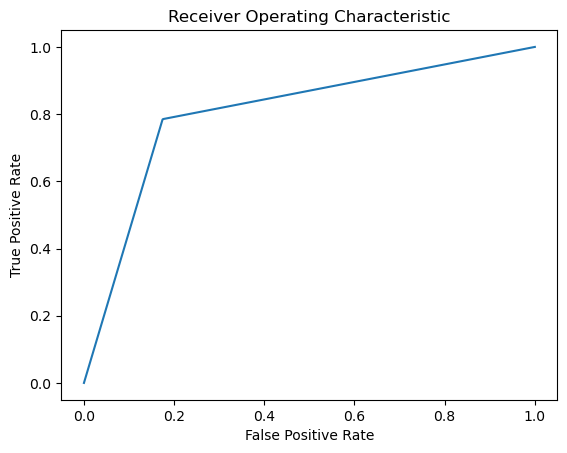

In [331]:
# Plot ROC Curve

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Observation:
            1. Decision Tree model - training and validation accuracy using kfold cross validation - 
                Training and Validation Accuracy - 79.86%
            2. Decision Tree model with kfold cross validation - Testing Accuracy - 80.75%
            3. Decision Tree model is neither overfitted nor underfitted

## Random Forest Tree Classifier

In [332]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [333]:
kfold = KFold(n_splits = 5, shuffle = True)

In [334]:
random_clf = RandomForestClassifier()

In [335]:
scores2 = cross_val_score(random_clf, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores2

array([0.85369775, 0.86736334, 0.86736334, 0.85760257, 0.87610619])

In [336]:
print(np.mean(scores2))

0.8644266412812069


In [337]:
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [338]:
# to check the confusion matrix

y_pred2 = random_clf.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[1369,  140],
       [ 196,  961]], dtype=int64)

In [339]:
random_clf.score(x_test, y_test)

0.8739684921230307

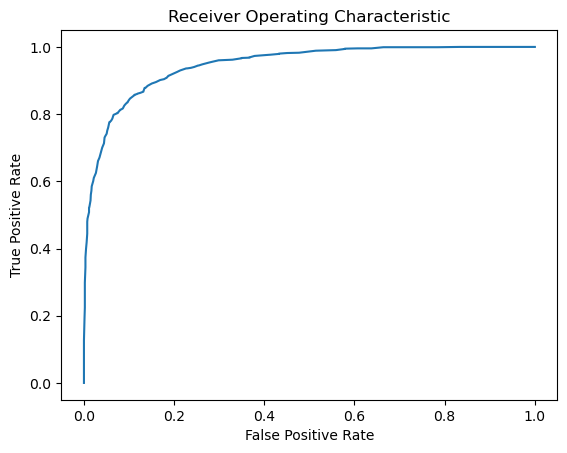

In [340]:
# Predicted probabilities
random_clf_y_test_prob = random_clf.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, random_clf_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Observation:
            1. Random Forest Tree - training and validation accuracy using kfold cross validation - 
                86.44%
            2. Random Forest Tree with kfold cross validation - Testing Accuracy - 87.39%
            3. Random Forest Tree model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## Extra Tree Classifier

In [341]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()

In [342]:
kfold = KFold(n_splits = 5, shuffle = True)

In [343]:
scores3 = cross_val_score(ETC, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores3

array([0.88665595, 0.87057878, 0.88263666, 0.87369268, 0.88495575])

In [344]:
print(np.mean(scores3))

0.8797039627702918


In [345]:
ETC.fit(x_train, y_train) 

ExtraTreesClassifier()

In [346]:
# to check the confusion matrix

y_pred3 = ETC.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[1382,  127],
       [ 161,  996]], dtype=int64)

In [347]:
ETC.score(x_test, y_test)

0.891972993248312

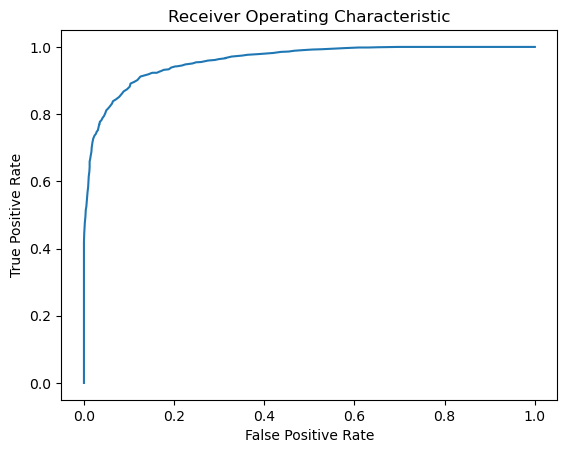

In [348]:
# Predicted probabilities
ETC_y_test_prob = ETC.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, ETC_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. Extra Tree Model - training and validation accuracy using kfold cross validation - 
                87.97%
            2. Extra Tree with kfold cross validation - Testing Accuracy - 89.19%
            3. Extra Tree model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## Logistic Regression Classifier

In [349]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y1, test_size = 0.30, random_state = 41)

In [350]:
LR = LogisticRegression()

In [351]:
kfold = KFold(n_splits = 5, shuffle = True)

In [352]:
scores4 = cross_val_score(LR, x_train1, y_train1, cv = kfold, scoring = 'accuracy')
scores4

array([0.77893891, 0.79019293, 0.77974277, 0.7851971 , 0.77554304])

In [353]:
print(np.mean(scores4))

0.7819229485763362


In [355]:
LR.fit(x_train1, y_train1) 

LogisticRegression()

In [356]:
# to check the confusion matrix

y_pred4 = LR.predict(x_test1)
cm4 = confusion_matrix(y_test1, y_pred4)
cm4

array([[1268,  241],
       [ 334,  823]], dtype=int64)

In [357]:
LR.score(x_test1, y_test1)

0.7843210802700675

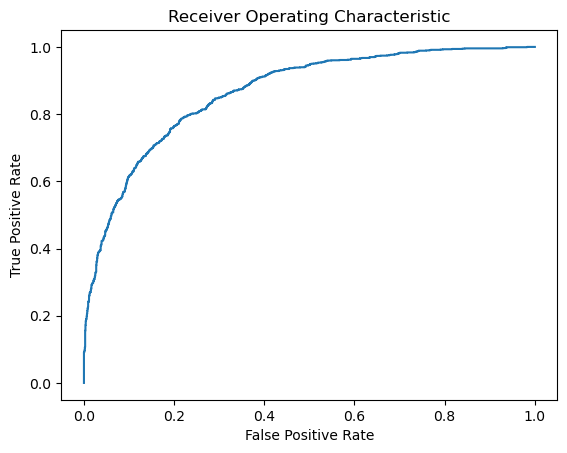

In [358]:
# Predicted probabilities
LR_y_test_prob = LR.predict_proba(x_test1)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test1, LR_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Observation:
            1. Logistic Regression model - training and validation accuracy using kfold cross 
               validation - 78.19%
            2. Logistic Regression with kfold cross validation - Testing Accuracy - 78.43%
            3. Logistic Regression model is neither overfitted nor underfitted

## KNN Classifier

In [359]:
kfold = KFold(n_splits = 5, shuffle = True)

In [360]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [361]:
scores5 = cross_val_score(knn, x_train1, y_train1, cv = kfold, scoring = 'accuracy')
scores5

array([0.82073955, 0.81430868, 0.82315113, 0.80611424, 0.8157683 ])

In [362]:
print(np.mean(scores5))

0.8160163798299415


In [363]:
knn.fit(x_train1, y_train1)

KNeighborsClassifier()

In [364]:
# to check the confusion matrix

y_pred5 = knn.predict(x_test1)
cm5 = confusion_matrix(y_test1, y_pred5)
cm5

array([[1230,  279],
       [ 171,  986]], dtype=int64)

In [365]:
knn.score(x_test1, y_test1)

0.8312078019504876

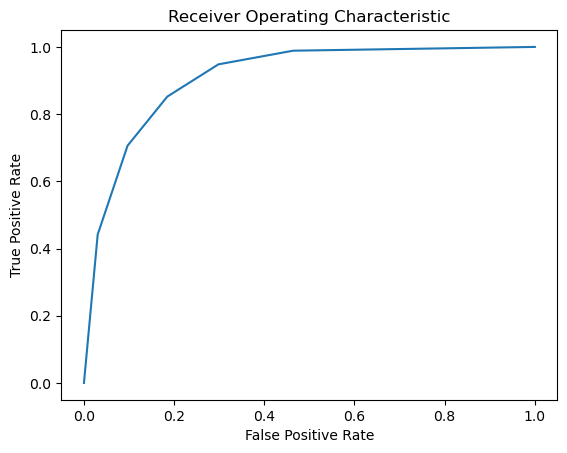

In [366]:
# Predicted probabilities
knn_y_test_prob = knn.predict_proba(x_test1)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test1, knn_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. KNN Classifier model - training and validation accuracy using kfold cross 
               validation - 81.60%
            2. KNN Classifier with kfold cross validation - Testing Accuracy - 83.12%
            3. KNN Classifier model is neither overfitted nor underfitted

## Gradient Boosting Classifier

In [367]:
from sklearn.ensemble import GradientBoostingClassifier

In [368]:
GB = GradientBoostingClassifier()

In [369]:
kfold = KFold(n_splits = 5, shuffle = True)

In [370]:
scores6 = cross_val_score(GB, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores6

array([0.85289389, 0.84244373, 0.85610932, 0.85840708, 0.83346742])

In [371]:
print(np.mean(scores6))

0.8486642885043704


In [372]:
GB.fit(x_train, y_train)

GradientBoostingClassifier()

In [373]:
# to check the confusion matrix

y_pred6 = GB.predict(x_test)
cm6 = confusion_matrix(y_test, y_pred6)
cm6

array([[1352,  157],
       [ 244,  913]], dtype=int64)

In [374]:
GB.score(x_test, y_test)

0.8495873968492123

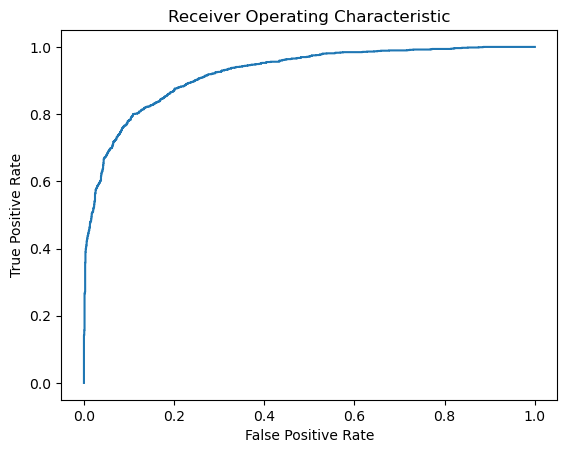

In [375]:
# Predicted probabilities
GB_y_test_prob = GB.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, GB_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. Gradient Boosting Classifier model - training and validation accuracy using kfold cross 
               validation - 84.86%
            2. Gradient Boosting Classifier with kfold cross validation - Testing Accuracy - 84.95%
            3. Gradient Boosting Classifier model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## AdaBoost Classifier

In [376]:
from sklearn.ensemble import AdaBoostClassifier

In [377]:
ADA = AdaBoostClassifier()

In [378]:
kfold = KFold(n_splits = 5, shuffle = True)
scores7 = cross_val_score(ADA, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores7

array([0.81993569, 0.82797428, 0.80787781, 0.80611424, 0.82059533])

In [379]:
print(np.mean(scores7))

0.8164994709925422


In [380]:
ADA.fit(x_train, y_train)

AdaBoostClassifier()

In [381]:
# to check the confusion matrix

y_pred7 = ADA.predict(x_test)
cm7 = confusion_matrix(y_test, y_pred7)
cm7

array([[1307,  202],
       [ 273,  884]], dtype=int64)

In [382]:
ADA.score(x_test, y_test)

0.8218304576144037

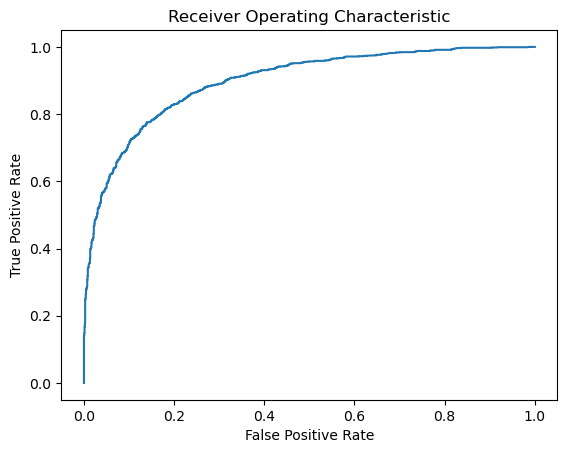

In [383]:
# Predicted probabilities
ADA_y_test_prob = ADA.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, ADA_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. AdaBoost Classifier model - training and validation accuracy using kfold cross 
               validation - 81.64%
            2. AdaBoost Classifier with kfold cross validation - Testing Accuracy - 82.18%
            3. AdaBoost Classifier model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

In [ ]:
Final Observations: 
            1. Decision Tree model with kfold cross validation - 80.75%
            2. Random Forest Tree model with kfold cross validation - 87.39%
            3. Extra Tree model with kfold cross validation - 89.19%
            4. Logistic Regression model with kfold cross validation - 78.43%
            5. KNN Classifier model with kfold cross validation - 83.12%
            6. Gradient Boosting Classifier with kfold cross validation - Testing Accuracy - 84.95%
            7. AdaBoost Classifier with kfold cross validation - Testing Accuracy - 82.18%
            5. We can chose Extra Tree model for hyper tuning

## HyperParameter Tuning for Extra Tree model as its accuracy is better 89.19%

In [384]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'random_state': [10, 50, 100, 1000], 'max_depth': [0, 10, 20, 25],
             'n_jobs': [-3, -2, -1, 1], 'n_estimators': [25, 50, 100, 200, 300]}


In [385]:
kfold = KFold(n_splits = 5, shuffle = True)

In [386]:
grid_search = GridSearchCV(estimator = ETC, param_grid = parameters, scoring = 'accuracy', cv = kfold)

In [387]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 25],
                         'n_estimators': [25, 50, 100, 200, 300],
                         'n_jobs': [-3, -2, -1, 1],
                         'random_state': [10, 50, 100, 1000]},
             scoring='accuracy')

In [388]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'n_estimators': 300,
 'n_jobs': -3,
 'random_state': 10}

## Retrain the model with the hyperparameters

In [389]:
ETC_final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 25, n_estimators = 300, n_jobs = -3,
 random_state = 10)

In [392]:
ETC_final_model.fit(x_train, y_train)

ExtraTreesClassifier(max_depth=25, n_estimators=300, n_jobs=-3, random_state=10)

In [393]:
grid_search.best_score_

0.8885493813587602

In [394]:
ETC_final_model.score(x_test, y_test)

0.8953488372093024

In [ ]:
Observation:
            1. Extra Tree model with hypertuning - accuracy - 89.53%
            2. Extra Tree model without hypertuning - accuracy - 89.19%
            3. We will choose Extra Tree model with hypertuning for prediction of the data

## Save the Model

In [395]:
# use Extra Tree Classifier and the save the model as it has good testing accuracy

import pickle
pickle.dump(ETC_final_model, open('Rainfall_Weather_Forecasting.pkl', 'wb'))

## prediction using the saved model

In [396]:
loaded_model = pickle.load(open('Rainfall_Weather_Forecasting.pkl', 'rb'))
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([0, 0, 0, ..., 0, 0, 1])

In [397]:
print(y_test)

4981    1
4824    0
5517    0
6986    1
7051    1
       ..
226     0
5482    0
3661    0
6880    1
204     1
Name: RainTomorrow, Length: 2666, dtype: int32


In [398]:
# comparing the predicted and actual values

a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = prediction_saved_model
df1['Original'] = a
df1

Predicted  Original
0             0         1
1             0         0
2             0         0
3             1         1
4             1         1
...         ...       ...
2661          0         0
2662          1         0
2663          0         0
2664          0         1
2665          1         1

[2666 rows x 2 columns]

Observation:
            1. Almost all actual and predicted values match
            2. This Rainfall_Weather_Forecasting.pkl can be used to predict whether or not it will
                rain tomorrow.

Observation:
            1. Decision Tree model with kfold cross validation - 80.75%
            2. Random Forest Tree model with kfold cross validation - 87.39%
            3. Extra Tree model with kfold cross validation - 89.19%
            4. Logistic Regression model with kfold cross validation - 78.43%
            5. KNN Classifier model with kfold cross validation - 83.12%
            6. Gradient Boosting Classifier with kfold cross validation - Testing Accuracy - 84.95%
            7. AdaBoost Classifier with kfold cross validation - Testing Accuracy - 82.18%   
            8. Extra Tree model with hypertuning - Testing accuracy -  89.53%
            9. Comparing all the Classifiers - Extra Tree model with hypertuning has the
               good accuracy and our model is also free from overfitting/underfitting problem

## Rainfall Weather Forecasting Project - Regression to predict how much rainfall could be there.

In [402]:
rainfall_reg_df.shape

(6762, 23)

In [403]:
rainfall_reg_df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1 2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2 2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3 2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4 2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8         No   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3         No   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Observation:
            1. Predict 'Rainfall' how much rainfall could be there in mm is a continous data
               so this is a Regression problem.

In [404]:
rainfall_reg_df['Rainfall'].value_counts()

0.000000      4334
0.200000       321
0.400000       144
2.805913       138
0.600000        87
              ... 
73.800000        1
23.800000        1
61.200000        1
128.000000       1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

In [405]:
rainfall_reg_df.shape

(6762, 23)

## Feature Encoding

In [406]:
# Convert Object data type to int type

rainfall_reg_df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [407]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [408]:
# seperating numerical and categorical columns

cat_col = []
for i in rainfall_reg_df.dtypes.index:
    if rainfall_reg_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in rainfall_reg_df.dtypes.index:
    if rainfall_reg_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Numerical Column ['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [409]:
for i in cat_col:
    rainfall_reg_df[i] = label_enc.fit_transform(rainfall_reg_df[i])

In [410]:
rainfall_reg_df.dtypes

Date             datetime64[ns]
Location                  int32
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int32
WindGustSpeed           float64
WindDir9am                int32
WindDir3pm                int32
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int32
RainTomorrow              int32
dtype: object

Observation:
            1. Converted all object type to int type.

## Check for Multicollinearity

In [411]:
rainfall_reg_df.shape

(6762, 23)

In [412]:
# get coefficient of one variable with all the other variables

cor = rainfall_reg_df.corr()
cor

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.090453  0.070832 -0.003490     0.138154  0.064514   
MinTemp        0.090453  1.000000  0.728063  0.092439     0.267755  0.047933   
MaxTemp        0.070832  0.728063  1.000000 -0.087620     0.345830  0.361249   
Rainfall      -0.003490  0.092439 -0.087620  1.000000    -0.000275 -0.190437   
Evaporation    0.138154  0.267755  0.345830 -0.000275     1.000000  0.262840   
Sunshine       0.064514  0.047933  0.361249 -0.190437     0.262840  1.000000   
WindGustDir   -0.074300 -0.150774 -0.217567  0.036672    -0.096780 -0.106207   
WindGustSpeed  0.262774  0.242375  0.164883  0.090857     0.162834  0.013039   
WindDir9am    -0.088884 -0.020875 -0.192523  0.091665    -0.083373 -0.079388   
WindDir3pm    -0.001275 -0.139535 -0.160997  0.032055    -0.036496 -0.055797   
WindSpeed9am   0.240984  0.169559  0.056748  0.051985     0.129189  0.024077   
WindSpeed3pm   0.230088  0.187798  0.115482  0.022619     0.110119  0.059477   
Humidity9am   -0.033612 -0.154224 -0.425012  0.228657    -0.242224 -0.388966   
Humidity3pm   -0.001340  0.067502 -0.430741  0.243354    -0.189347 -0.446497   
Pressure9am   -0.037507 -0.441325 -0.337877 -0.073020    -0.201735 -0.003533   
Pressure3pm   -0.023255 -0.440888 -0.413459 -0.034082    -0.216361 -0.059875   
Cloud9am      -0.011615  0.087812 -0.246427  0.193093    -0.072151 -0.551186   
Cloud3pm      -0.013584  0.040742 -0.243364  0.160200    -0.119730 -0.568954   
Temp9am        0.098478  0.891401  0.866615 -0.004171     0.314590  0.246864   
Temp3pm        0.066192  0.696614  0.974843 -0.091945     0.338812  0.379144   
RainToday     -0.004280  0.075905 -0.225662  0.459135    -0.112325 -0.256126   
RainTomorrow  -0.004506  0.097171 -0.160218  0.224217    -0.076600 -0.345379   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.074300       0.262774   -0.088884   -0.001275  ...   
MinTemp          -0.150774       0.242375   -0.020875   -0.139535  ...   
MaxTemp          -0.217567       0.164883   -0.192523   -0.160997  ...   
Rainfall          0.036672       0.090857    0.091665    0.032055  ...   
Evaporation      -0.096780       0.162834   -0.083373   -0.036496  ...   
Sunshine         -0.106207       0.013039   -0.079388   -0.055797  ...   
WindGustDir       1.000000       0.000480    0.385221    0.502140  ...   
WindGustSpeed     0.000480       1.000000   -0.075987    0.078794  ...   
WindDir9am        0.385221      -0.075987    1.000000    0.216648  ...   
WindDir3pm        0.502140       0.078794    0.216648    1.000000  ...   
WindSpeed9am      0.015291       0.584105    0.056413    0.010819  ...   
WindSpeed3pm      0.106009       0.615217    0.044693    0.085263  ...   
Humidity9am       0.040937      -0.265362    0.015462   -0.005558  ...   
Humidity3pm       0.048025      -0.092423    0.126407   -0.009464  ...   
Pressure9am      -0.110879      -0.394086   -0.027671   -0.139020  ...   
Pressure3pm      -0.029383      -0.363669    0.050710   -0.049299  ...   
Cloud9am          0.121621       0.007703    0.079419    0.072567  ...   
Cloud3pm          0.088311       0.053480    0.058235    0.052121  ...   
Temp9am          -0.171100       0.221060   -0.070937   -0.146479  ...   
Temp3pm          -0.231060       0.129193   -0.200949   -0.175048  ...   
RainToday         0.123042       0.085796    0.157884    0.094507  ...   
RainTomorrow      0.048487       0.184221    0.040399    0.004301  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Location         -0.033612    -0.001340    -0.037507    -0.023255 -0.011615   
MinTemp          -0.154224     0.067502    -0.441325    -0.440888  0.087812   
MaxTemp          -0.425012    -0.430741    -0.337877    -0.413459 -0.246427   
Rainfall          0.228657     0.243354    -0.073020    -0.034082  0.193093   
Evaporation      -0.242224    -0.189347    -0.201735    -0.216361 -0.072151 

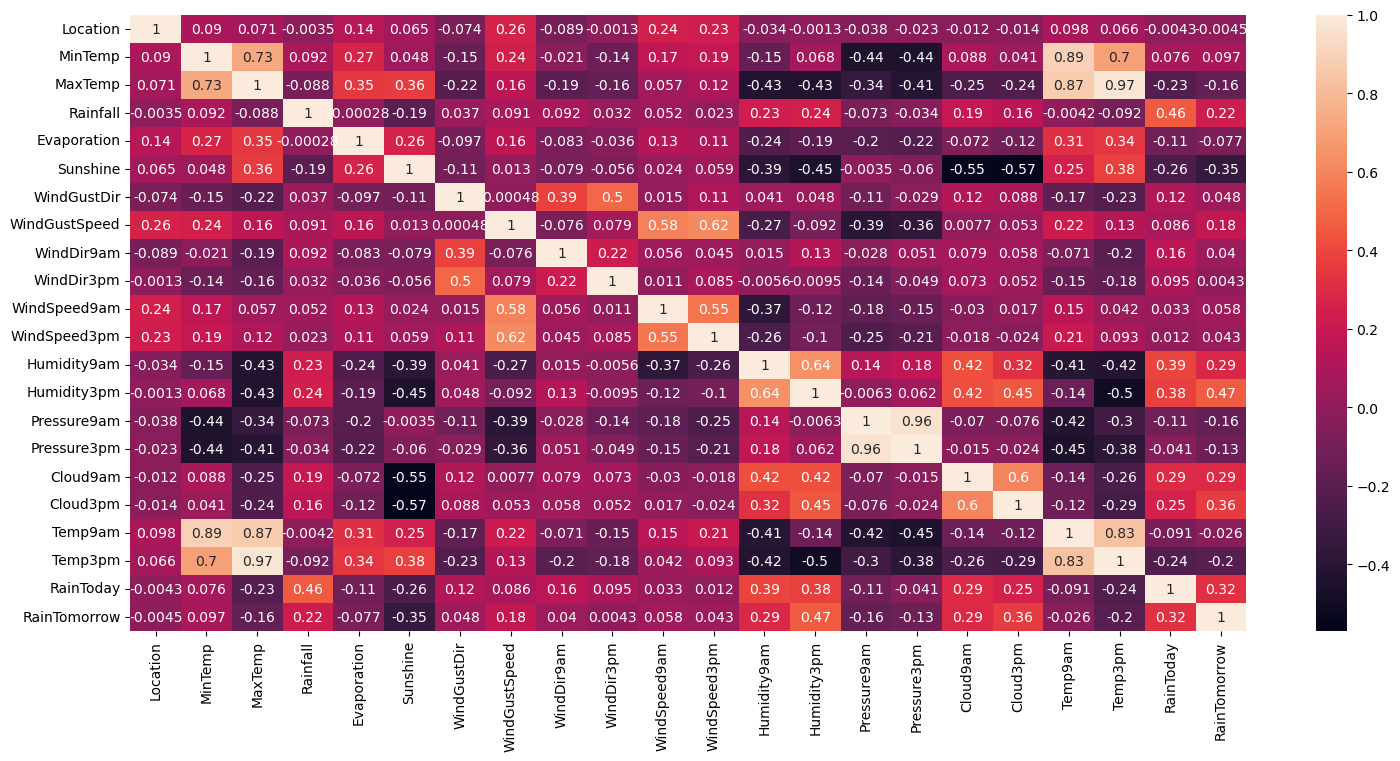

In [413]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'MaxTemp' v/s 'Temp3pm' has more positive correlation 
                0.97. This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

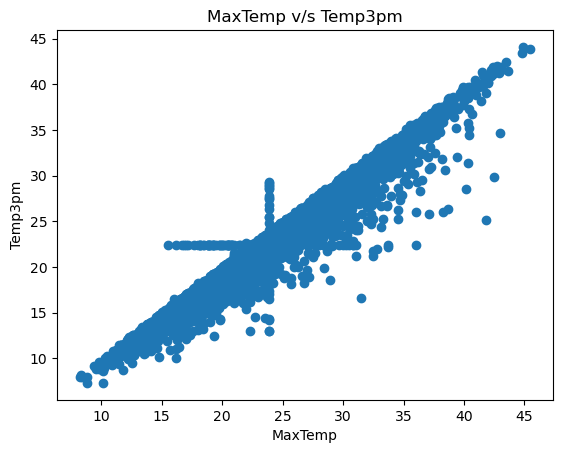

In [414]:
# one more proof so will plot scatter plot and check

plt.scatter(rainfall_reg_df['MaxTemp'], rainfall_reg_df.Temp3pm)
plt.xlabel("MaxTemp")
plt.ylabel("Temp3pm")
plt.title("MaxTemp v/s Temp3pm")
plt.show()

Observation:
            1. feature v/s feature - 'MaxTemp' v/s 'Temp3pm' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'MaxTemp' increases 'Temp3pm' value increases - positive correlation

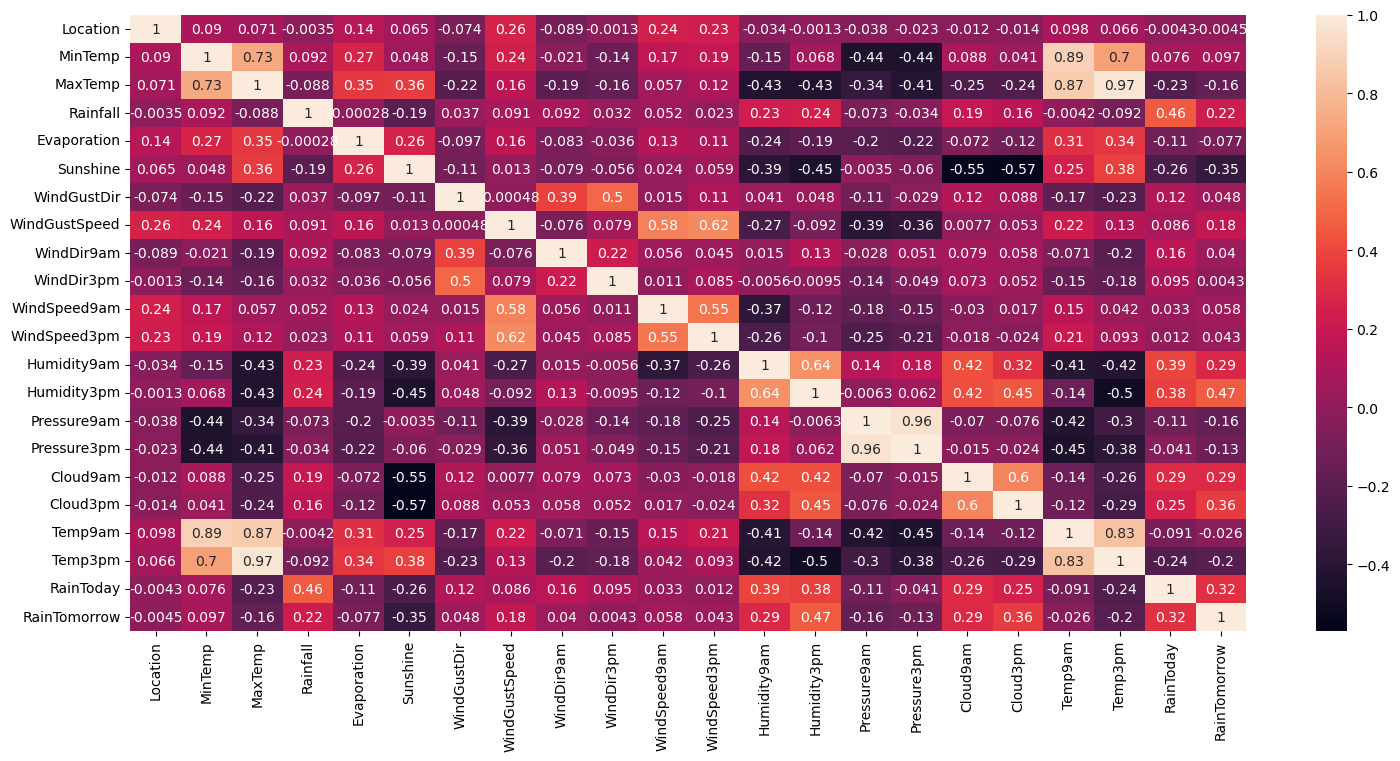

In [415]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'MaxTemp' v/s 'Rainfall' is -0.088 and 'Temp3pm' v/s 
               'Rainfall' is -0.092 from this heatmap 
                we get to know 'MaxTemp' is contributing more to 'Rainfall' than 
                'Temp3pm'. so we can remove 'Temp3pm' feature.

In [416]:
rainfall_reg_df.shape

(6762, 23)

In [417]:
rainfall_reg_df.drop(['Temp3pm'], axis = 1, inplace = True)

In [418]:
rainfall_reg_df.shape

(6762, 22)

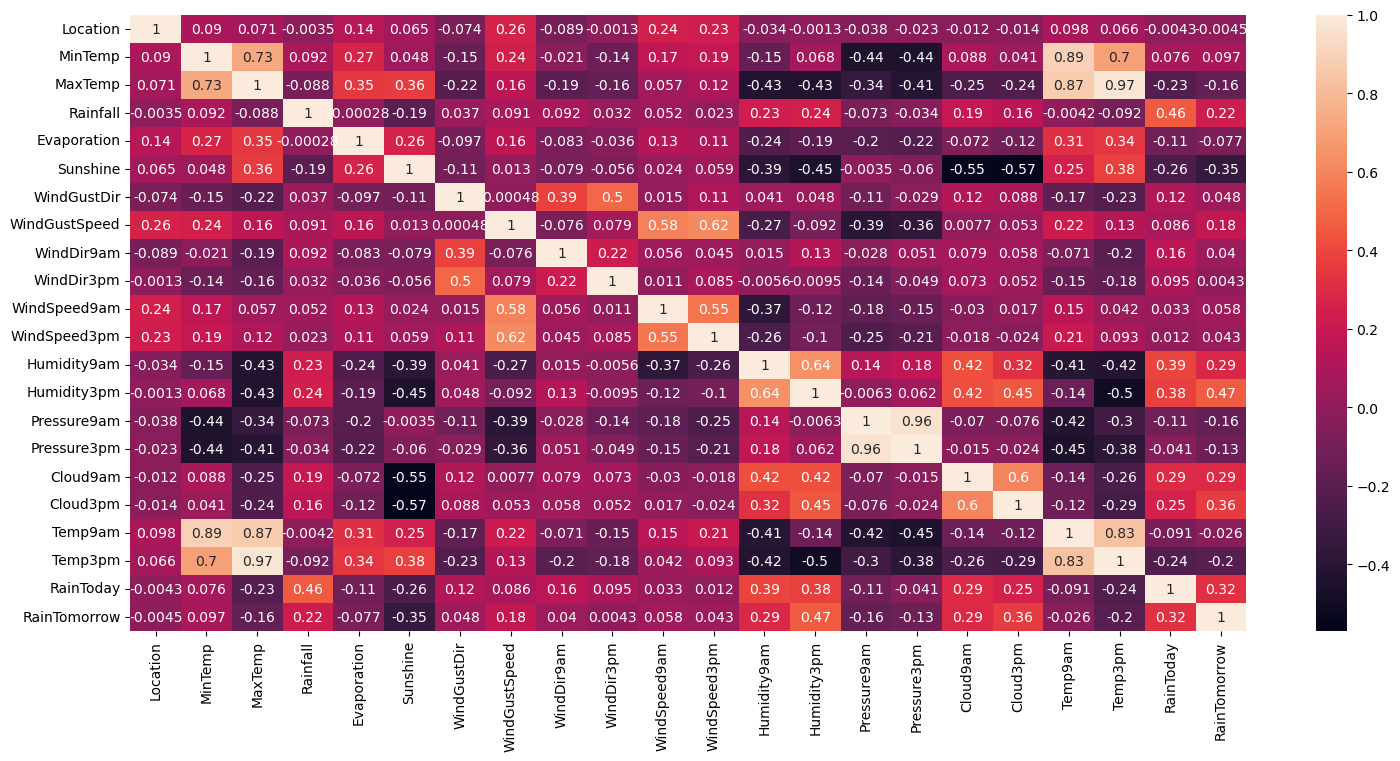

In [419]:
# visualize correlation using heatmap

plt.figure(figsize = (18, 8))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [ ]:
Observation:
            1. feature v/s feature - 'MaxTemp' v/s 'Temp9am' has more positive correlation 
                0.87. This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

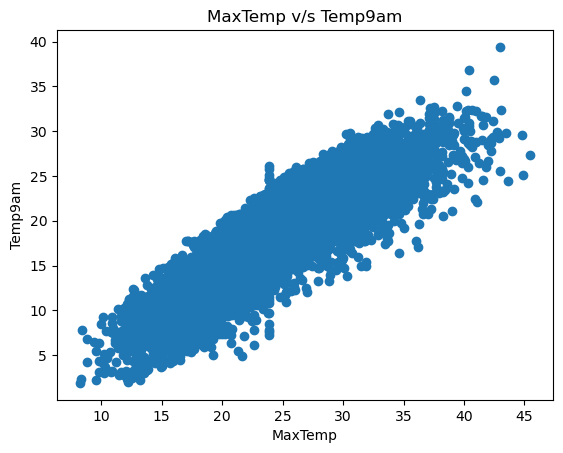

In [420]:
# one more proof so will plot scatter plot and check

plt.scatter(rainfall_reg_df['MaxTemp'], rainfall_reg_df.Temp9am)
plt.xlabel("MaxTemp")
plt.ylabel("Temp9am")
plt.title("MaxTemp v/s Temp9am")
plt.show()

Observation:
            1. feature v/s feature - 'MaxTemp' v/s 'Temp9am' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'MaxTemp' increases 'Temp9am' value increases - positive correlation

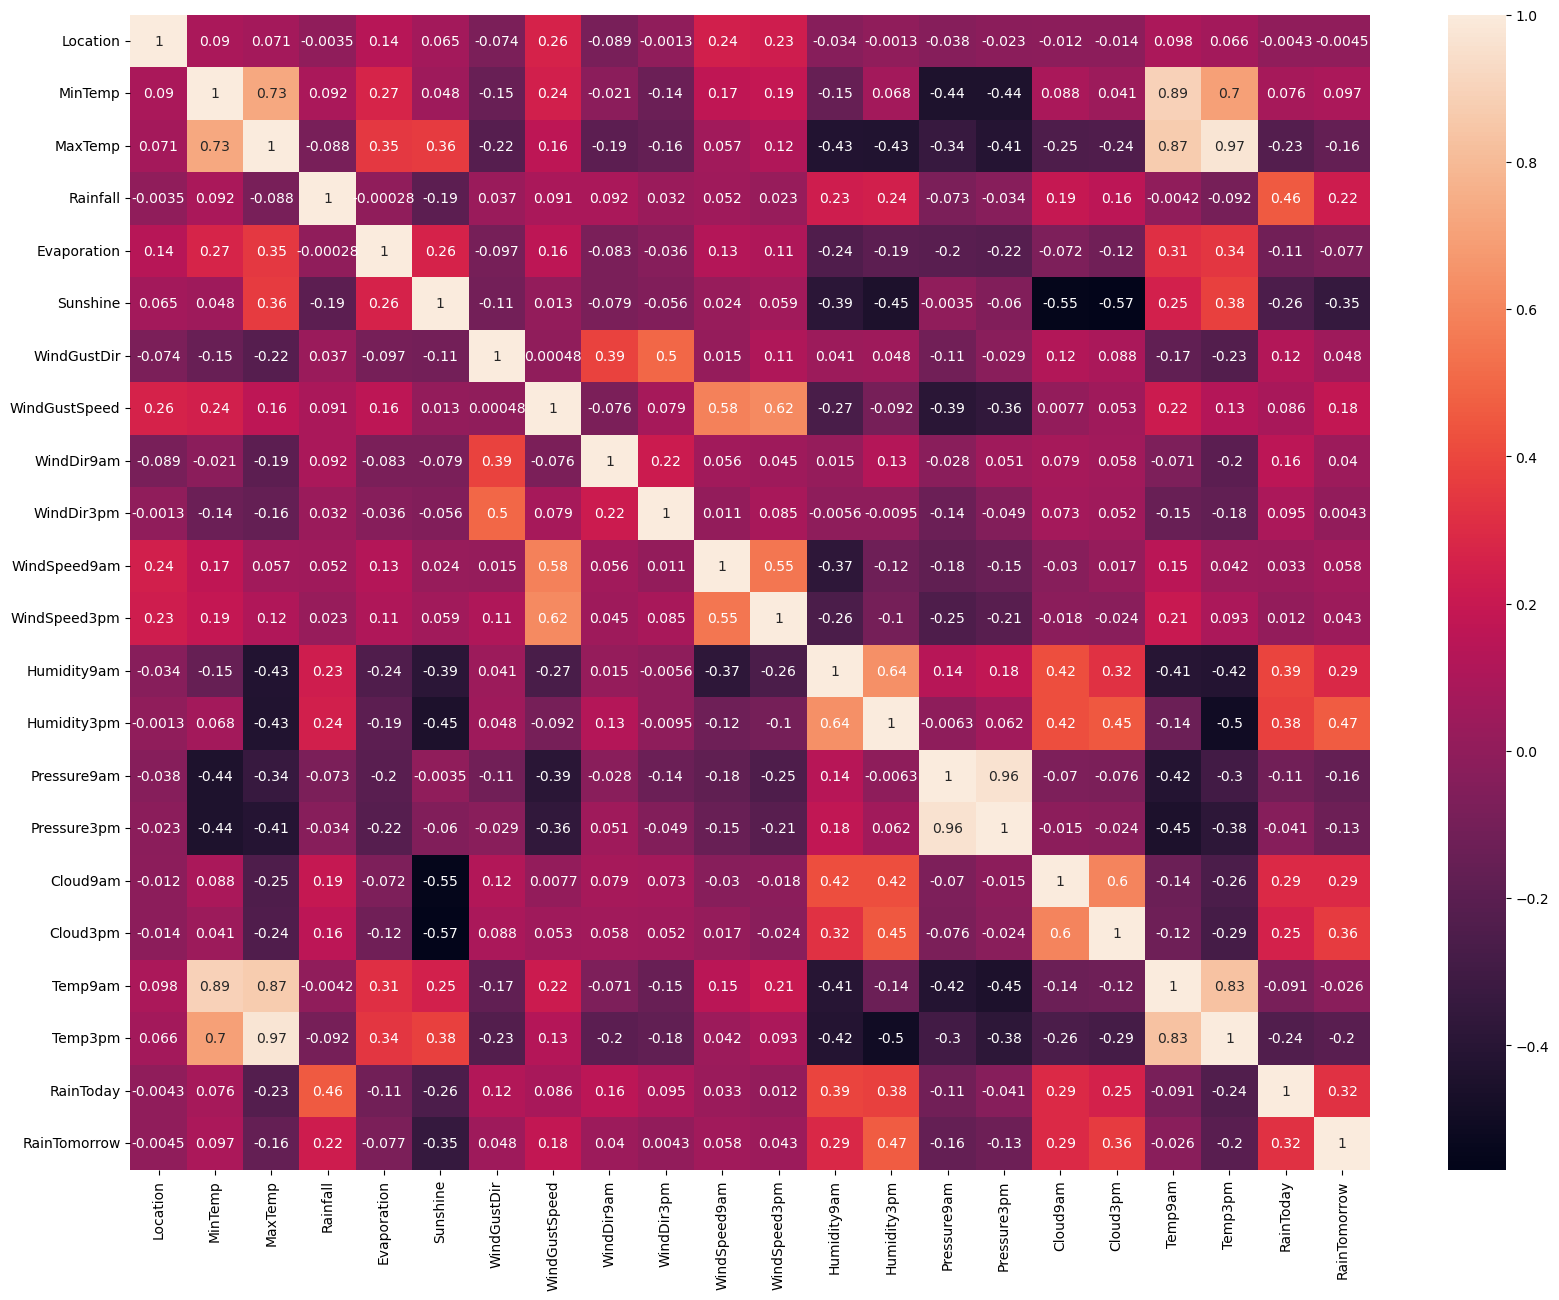

In [421]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s label - 'MaxTemp' v/s 'Rainfall' is -0.088 and 'Temp9am' v/s 
               'Rainfall' is -0.0042 from this heatmap 
                we get to know 'MaxTemp' is contributing less to 'Rainfall' than 
                'Temp9am'. so we can remove 'MaxTemp' feature. 

In [422]:
rainfall_reg_df.shape

(6762, 22)

In [423]:
rainfall_reg_df.drop(['MaxTemp'], axis = 1, inplace = True)

In [425]:
rainfall_reg_df.shape

(6762, 21)

## Seperating features and target

In [426]:
rainfall_reg_df.columns

Index(['Date', 'Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [427]:
x2 = rainfall_reg_df.drop(['Date', 'Rainfall'], axis = 1) 
y2 = rainfall_reg_df['Rainfall']

In [428]:
x2.shape

(6762, 19)

In [429]:
y2.shape

(6762,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [430]:
x2.columns

Index(['Location', 'MinTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [431]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x2)
x_scaled

array([[-1.39509696,  0.05234111,  0.0147794 , ..., -0.17372156,
        -0.55035459, -0.55035459],
       [-1.39509696, -1.0306399 ,  0.0147794 , ..., -0.12129234,
        -0.55035459, -0.55035459],
       [-1.39509696, -0.03790731,  0.0147794 , ...,  0.54281116,
        -0.55035459, -0.55035459],
       ...,
       [ 1.18619268, -1.39163357,  0.0147794 , ..., -0.9426835 ,
        -0.55035459, -0.55035459],
       [ 1.18619268, -0.95844117,  0.0147794 , ..., -0.4882969 ,
        -0.55035459, -0.55035459],
       [ 1.18619268,  0.32308636,  0.0147794 , ..., -0.50577331,
        -0.55035459, -0.55035459]])

In [432]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x2.columns
vif

VIF Values       Features
0     1.154677       Location
1     8.582489        MinTemp
2     1.223876    Evaporation
3     1.909075       Sunshine
4     1.588031    WindGustDir
5     2.332034  WindGustSpeed
6     1.302530     WindDir9am
7     1.464866     WindDir3pm
8     2.011993   WindSpeed9am
9     1.880338   WindSpeed3pm
10    3.178826    Humidity9am
11    2.365903    Humidity3pm
12   19.514092    Pressure9am
13   18.706616    Pressure3pm
14    1.985233       Cloud9am
15    1.904352       Cloud3pm
16    9.937008        Temp9am
17    1.395156      RainToday
18    1.486830   RainTomorrow

Observation: 
            1. The threshold VIF value is 10 and any feature > 10 VIF value has high correlation with 
               other features. Here we can observe two features are above the threshold value. 
               so there is no multicollinearity problem. 
            2. remove two features - 'Pressure9am', 'Pressure3pm'

In [433]:
rainfall_reg_df.shape

(6762, 21)

In [434]:
rainfall_reg_df.drop(['Pressure9am', 'Pressure3pm'], axis = 1, inplace = True)

In [435]:
rainfall_reg_df.shape

(6762, 19)

## Checking Outliers

In [436]:
rainfall_reg_df.columns

Index(['Date', 'Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [437]:
# we dont check outliers for labels - so remove the label

rainfall_reg_df_features = rainfall_reg_df.drop(['Date', 'Rainfall'], axis = 1)

In [438]:
rainfall_reg_df_features.shape

(6762, 17)

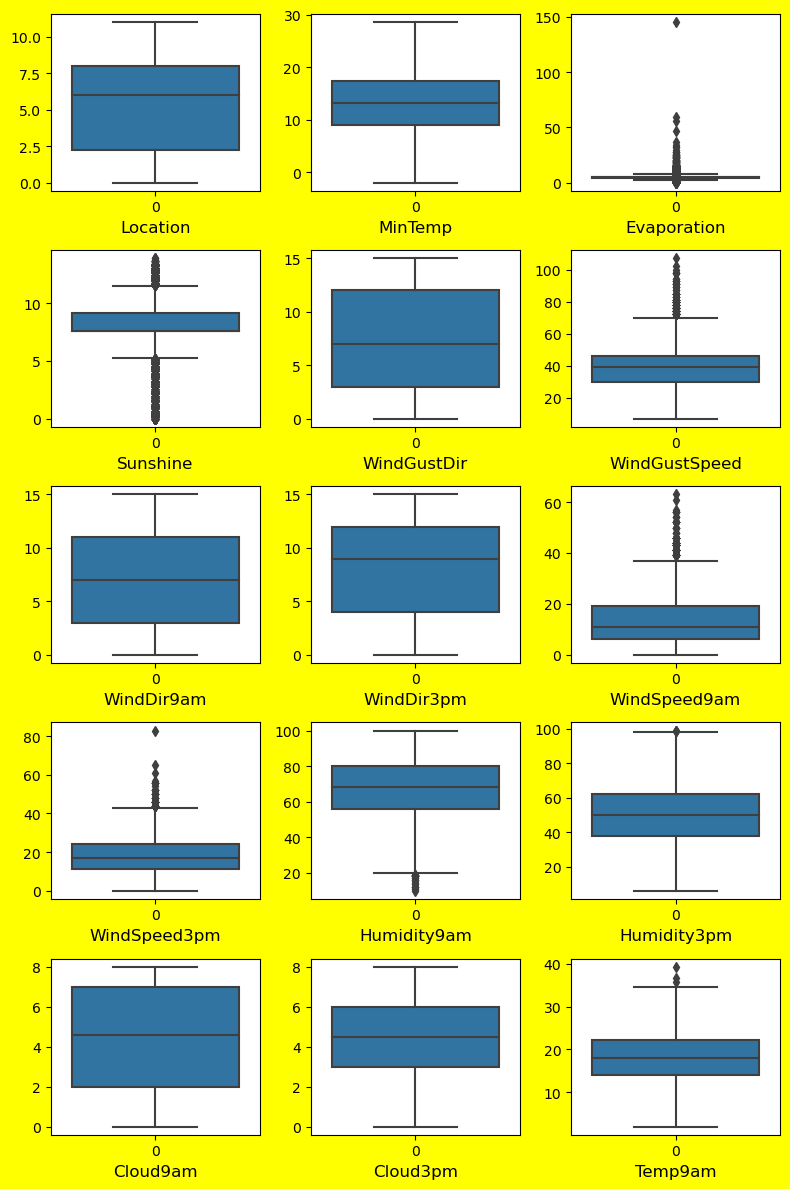

In [439]:
# Visualize the outliers using boxplot

plt.figure(figsize=(8,12), facecolor = 'yellow')
p = 1
for i in rainfall_reg_df_features:
    if p <= 15:
        ax = plt.subplot(5, 3, p)
        sns.boxplot(data = rainfall_reg_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

observations:
            1. More Outliers found in features 
            2. This outliers are right skewed and left skewed (i.e. outliers are above max value and 
               below min value)

In [440]:
rainfall_reg_df_features.columns

Index(['Location', 'MinTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Find IQR to identify outliers and remove it

In [441]:
# there are situation we should remove outliers and sometime to keep outliers

q1 = rainfall_reg_df.quantile(0.25)
q3 = rainfall_reg_df.quantile(0.75)
iqr = q3 - q1

In [442]:
# validating one outlier

WindSpeed9am_high = (q3['WindSpeed9am'] + (1.5 * iqr['WindSpeed9am']))
WindSpeed9am_high

# anything > 38.5 outliers

38.5

In [443]:
# check the index which have the higher values

np_index = np.where(rainfall_reg_df['WindSpeed9am'] > WindSpeed9am_high)
np_index

# remove these indexes as they are outliers

(array([ 928,  979,  980,  981, 1535, 1903, 1945, 2016, 2074, 2186, 2219,
        2900, 2930, 3026, 3027, 3042, 3052, 3067, 3068, 3077, 3082, 3089,
        3099, 3101, 3110, 3153, 3169, 3278, 3360, 3446, 3514, 3557, 3563,
        3607, 3608, 3609, 3610, 3618, 3670, 3676, 3683, 3701, 3702, 3727,
        3755, 3773, 3777, 3786, 3795, 3805, 3806, 3812, 3831, 3879, 3931,
        3954, 3975, 3981, 4007, 4032, 4034, 4040, 4066, 4071, 4082, 4093,
        4104, 4127, 4128, 4150, 4186, 4187, 4231, 4244, 4267, 4276, 4299,
        4300, 4301, 4303, 4304, 4327, 4336, 4337, 4349, 4352, 4355, 4359,
        4360, 4361, 4382, 4383, 4390, 4391, 4400, 4403, 4412, 4423, 4432,
        4433, 4434, 4455, 4457, 4462, 4466, 4471, 4472, 4479, 5297, 5338,
        5344, 5353, 5374, 5641, 5667, 5674, 5720, 5799, 6202, 6343, 6361,
        6391], dtype=int64),)

In [444]:
rainfall_reg_df.shape

(6762, 19)

In [445]:
rainfall_reg_df = rainfall_reg_df.drop(rainfall_reg_df.index[np_index])

In [446]:
rainfall_reg_df.shape  # 122 rows removed - outliers

(6640, 19)

In [447]:
rainfall_reg_df

Date  Location  MinTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01         1     13.4       0.6     5.389395  7.632205   
1    2008-12-02         1      7.4       0.0     5.389395  7.632205   
2    2008-12-03         1     12.9       0.0     5.389395  7.632205   
3    2008-12-04         1      9.2       0.0     5.389395  7.632205   
4    2008-12-05         1     17.5       1.0     5.389395  7.632205   
...         ...       ...      ...       ...          ...       ...   
6757 2017-06-21         9      2.8       0.0     5.389395  7.632205   
6758 2017-06-22         9      3.6       0.0     5.389395  7.632205   
6759 2017-06-23         9      5.4       0.0     5.389395  7.632205   
6760 2017-06-24         9      7.8       0.0     5.389395  7.632205   
6761 2017-06-25         9     14.9       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              13      44.000000          13          14          20.0   
1              14      44.000000           6          15           4.0   
2              15      46.000000          13          15          19.0   
3               4      24.000000           9           0          11.0   
4              13      41.000000           1           7           7.0   
...           ...            ...         ...         ...           ...   
6757            0      31.000000           9           1          13.0   
6758            6      22.000000           9           3          13.0   
6759            3      37.000000           9          14           9.0   
6760            9      28.000000          10           3          13.0   
6761            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  Temp9am  \
0             24.0         71.0         22.0  8.000000  4.503183     16.9   
1             22.0         44.0         25.0  4.566622  4.503183     17.2   
2             26.0         38.0         30.0  4.566622  2.000000     21.0   
3              9.0         45.0         16.0  4.566622  4.503183     18.1   
4             20.0         82.0         33.0  7.000000  8.000000     17.8   
...            ...          ...          ...       ...       ...      ...   
6757          11.0         51.0         24.0  4.566622  4.503183     10.1   
6758           9.0         56.0         21.0  4.566622  4.503183     10.9   
6759           9.0         53.0         24.0  4.566622  4.503183     12.5   
6760           7.0         51.0         24.0  3.000000  2.000000     15.1   
6761          17.0         62.0         36.0  8.000000  8.000000     15.0   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
6757          0             0  
6758          0             0  
6759          0             0  
6760          0             0  
6761          0             0  

[6640 rows x 19 columns]

In [448]:
rainfall_reg_df.reset_index(inplace = True, drop = True)

In [449]:
rainfall_reg_df

Date  Location  MinTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01         1     13.4       0.6     5.389395  7.632205   
1    2008-12-02         1      7.4       0.0     5.389395  7.632205   
2    2008-12-03         1     12.9       0.0     5.389395  7.632205   
3    2008-12-04         1      9.2       0.0     5.389395  7.632205   
4    2008-12-05         1     17.5       1.0     5.389395  7.632205   
...         ...       ...      ...       ...          ...       ...   
6635 2017-06-21         9      2.8       0.0     5.389395  7.632205   
6636 2017-06-22         9      3.6       0.0     5.389395  7.632205   
6637 2017-06-23         9      5.4       0.0     5.389395  7.632205   
6638 2017-06-24         9      7.8       0.0     5.389395  7.632205   
6639 2017-06-25         9     14.9       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
0              13      44.000000          13          14          20.0   
1              14      44.000000           6          15           4.0   
2              15      46.000000          13          15          19.0   
3               4      24.000000           9           0          11.0   
4              13      41.000000           1           7           7.0   
...           ...            ...         ...         ...           ...   
6635            0      31.000000           9           1          13.0   
6636            6      22.000000           9           3          13.0   
6637            3      37.000000           9          14           9.0   
6638            9      28.000000          10           3          13.0   
6639            3      40.174469           2           2          17.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Cloud9am  Cloud3pm  Temp9am  \
0             24.0         71.0         22.0  8.000000  4.503183     16.9   
1             22.0         44.0         25.0  4.566622  4.503183     17.2   
2             26.0         38.0         30.0  4.566622  2.000000     21.0   
3              9.0         45.0         16.0  4.566622  4.503183     18.1   
4             20.0         82.0         33.0  7.000000  8.000000     17.8   
...            ...          ...          ...       ...       ...      ...   
6635          11.0         51.0         24.0  4.566622  4.503183     10.1   
6636           9.0         56.0         21.0  4.566622  4.503183     10.9   
6637           9.0         53.0         24.0  4.566622  4.503183     12.5   
6638           7.0         51.0         24.0  3.000000  2.000000     15.1   
6639          17.0         62.0         36.0  8.000000  8.000000     15.0   

      RainToday  RainTomorrow  
0             0             0  
1             0             0  
2             0             0  
3             0             0  
4             0             0  
...         ...           ...  
6635          0             0  
6636          0             0  
6637          0             0  
6638          0             0  
6639          0             0  

[6640 rows x 19 columns]

## Checking for Skewness

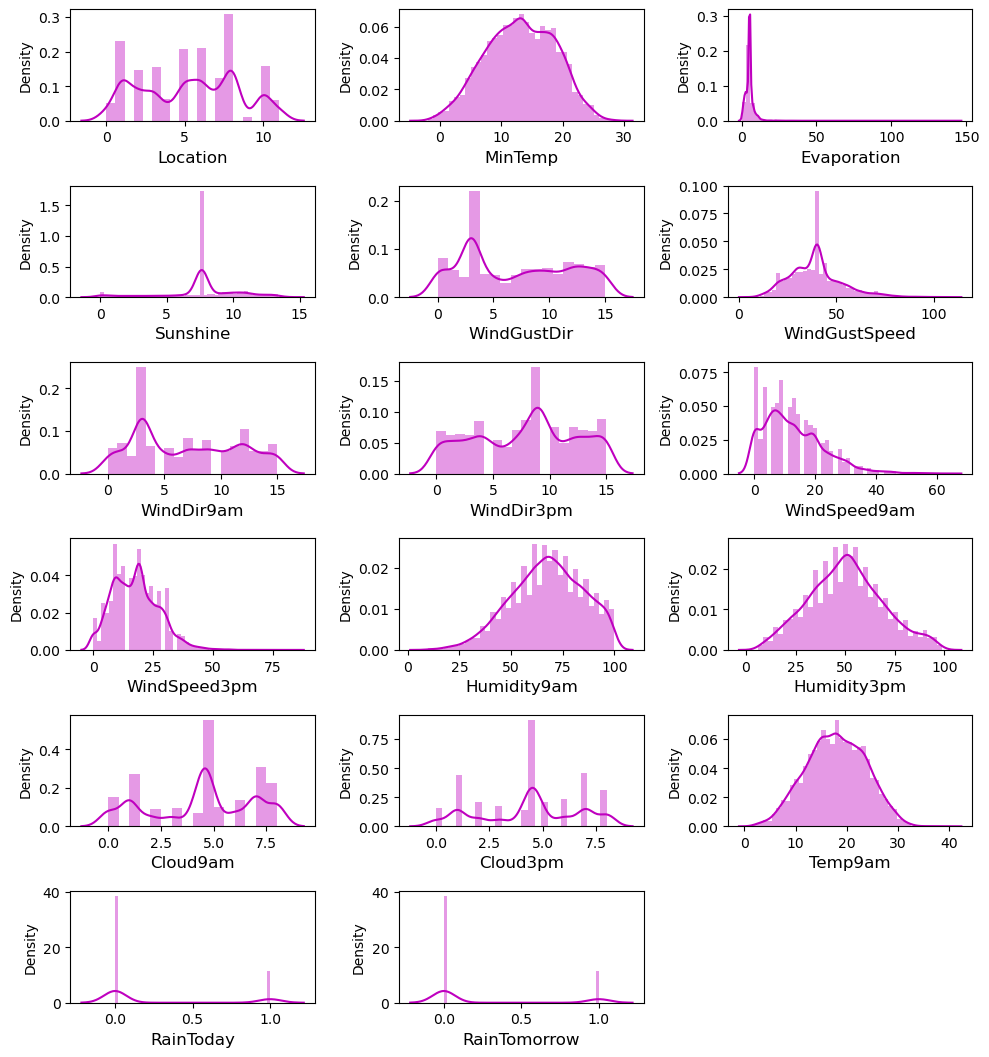

In [450]:
# how the data is distributed

plt.figure(figsize=(10,12))
p = 1
for i in rainfall_reg_df_features:
    if p <= 20:
        ax = plt.subplot(7, 3, p)
        sns.distplot(rainfall_reg_df_features[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

In [451]:
rainfall_reg_df.skew() # not in the range -0.5 to +0.5

Location          0.002503
MinTemp          -0.076462
Rainfall         13.819872
Evaporation      13.912407
Sunshine         -0.750242
WindGustDir       0.165109
WindGustSpeed     0.687092
WindDir9am        0.205027
WindDir3pm       -0.135454
WindSpeed9am      0.583823
WindSpeed3pm      0.501343
Humidity9am      -0.271951
Humidity3pm       0.142538
Cloud9am         -0.289538
Cloud3pm         -0.220385
Temp9am          -0.045609
RainToday         1.259603
RainTomorrow      1.272587
dtype: float64

In [452]:
# removing for skewness

rainfall_reg_df['Rainfall'] = np.cbrt(rainfall_reg_df['Rainfall'])

rainfall_reg_df['Evaporation'] = np.cbrt(rainfall_reg_df['Evaporation'])

rainfall_reg_df['WindGustSpeed'] = np.cbrt(rainfall_reg_df['WindGustSpeed'])

rainfall_reg_df['RainToday'] = np.cbrt(rainfall_reg_df['RainToday'])

rainfall_reg_df['RainTomorrow'] = np.cbrt(rainfall_reg_df['RainTomorrow'])

In [454]:
rainfall_reg_df.skew() 

Location         0.002503
MinTemp         -0.076462
Rainfall         1.659022
Evaporation     -0.096916
Sunshine        -0.750242
WindGustDir      0.165109
WindGustSpeed   -0.127503
WindDir9am       0.205027
WindDir3pm      -0.135454
WindSpeed9am     0.583823
WindSpeed3pm     0.501343
Humidity9am     -0.271951
Humidity3pm      0.142538
Cloud9am        -0.289538
Cloud3pm        -0.220385
Temp9am         -0.045609
RainToday        1.259603
RainTomorrow     1.272587
dtype: float64

Observation:
            1. Some features - there are skewness.

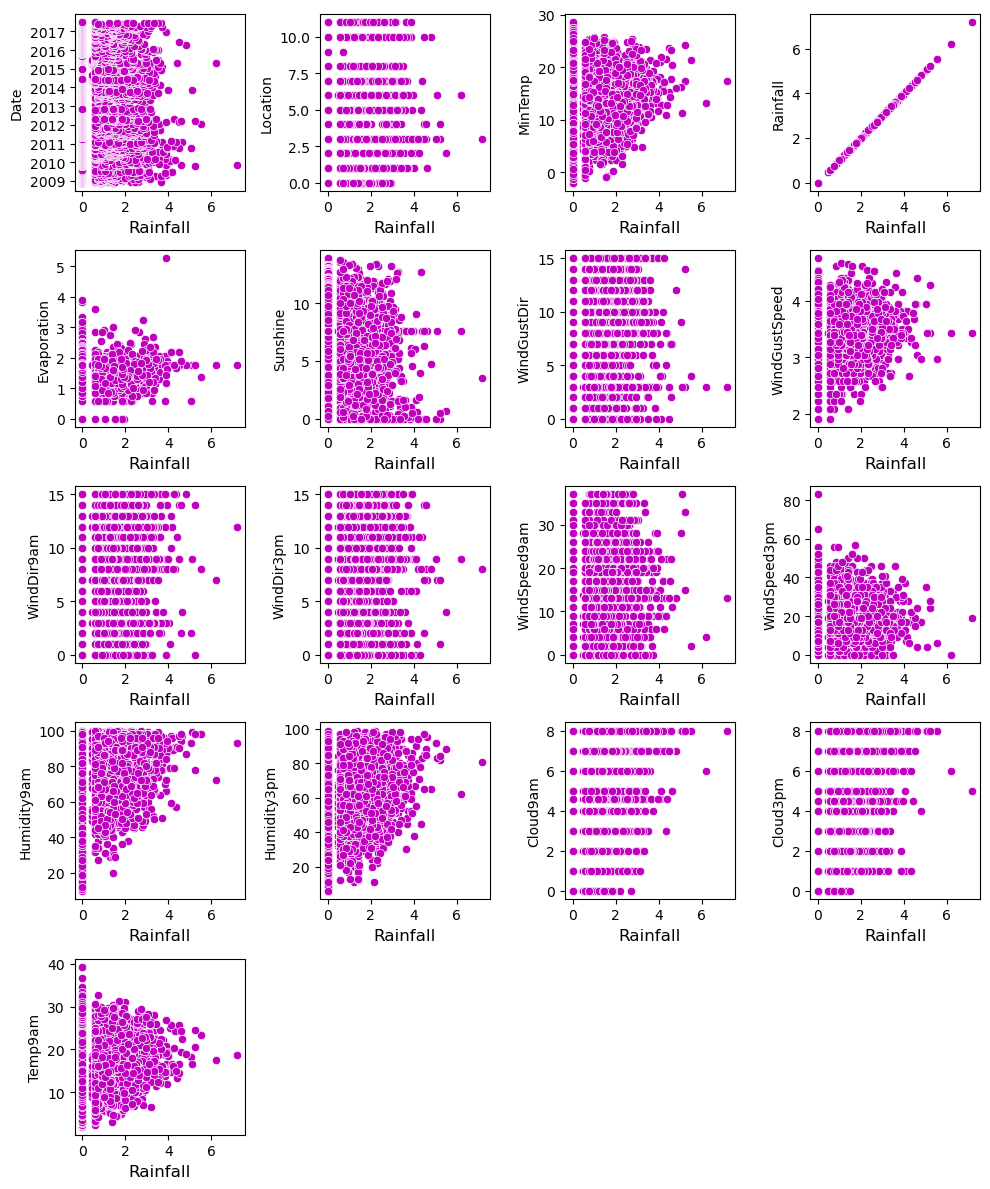

In [455]:
# check the distribution of data in the continuos 

plt.figure(figsize=(10,12))
p = 1
for i in rainfall_reg_df:
    if p <= 17:
        ax = plt.subplot(5, 4, p)
        sns.scatterplot(x = 'Rainfall', y = i, color = 'm', data = rainfall_reg_df)
        plt.xlabel('Rainfall', fontsize = 12)
        plt.ylabel(i)
    p = p + 1
plt.tight_layout()

## Seperating features and target

In [456]:
rainfall_reg_df.columns

Index(['Date', 'Location', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [457]:
rainfall_reg_df.shape

(6640, 19)

In [510]:
x2 = rainfall_reg_df.drop(['Date', 'Rainfall'], axis = 1) 
y2 = rainfall_reg_df['Rainfall']

In [511]:
x2.shape

(6640, 17)

In [512]:
y2.shape

(6640,)

In [513]:
train_per1 = 0.7

In [514]:
train_samples1 = int(len(x2) * train_per1)

In [515]:
x_train2, y_train2 = x2[:train_samples1], y2[:train_samples1]

In [516]:
x_test2, y_test2 = x2[train_samples1:], y2[train_samples1:]

In [517]:
x_train2.shape

(4648, 17)

In [518]:
y_train2.shape

(4648,)

In [519]:
x_test2.shape

(1992, 17)

In [520]:
y_test2.shape

(1992,)

In [521]:
s = StandardScaler()
x_scaled_1 = s.fit_transform(x_train2)
x_scaled_1

array([[-1.31560959,  0.14968344,  0.24517396, ..., -0.02083606,
        -0.57668779, -0.5713878 ],
       [-1.31560959, -0.96109437,  0.24517396, ...,  0.03372499,
        -0.57668779, -0.5713878 ],
       [-1.31560959,  0.05711862,  0.24517396, ...,  0.72483154,
        -0.57668779, -0.5713878 ],
       ...,
       [-0.99483356,  1.46410385,  1.04049096, ...,  1.59780823,
        -0.57668779, -0.5713878 ],
       [-0.99483356,  1.76031126,  1.16718663, ...,  1.83423942,
        -0.57668779, -0.5713878 ],
       [-0.99483356,  1.26046125,  1.46644388, ...,  1.97973554,
        -0.57668779, -0.5713878 ]])

## Modelling

## Linear Regression

In [522]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

In [523]:
kfold = KFold(n_splits = 5, shuffle = True)

In [524]:
model_LR = LinearRegression()

In [525]:
LR_scores1 = cross_val_score(model_LR, x_scaled_1, y_train2, cv = kfold, scoring = 'r2')
LR_scores1

array([0.75942583, 0.74310266, 0.70954437, 0.72703494, 0.7436942 ])

In [526]:
print(np.mean(LR_scores1)) 

0.7365604008370744


In [527]:
model_LR.fit(x_train2, y_train2)

LinearRegression()

In [528]:
LR_test_acc = model_LR.score(x_test2, y_test2)
print(LR_test_acc)

0.8218242063091156


In [529]:
y_pred_LR = model_LR.predict(x_test2)
y_pred_LR

array([ 0.01901192,  0.06152412,  0.12711942, ...,  0.03629195,
       -0.02408574,  0.15200915])

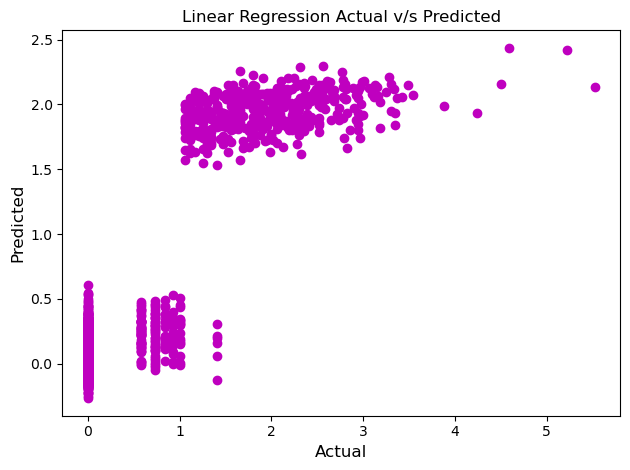

In [530]:
plt.scatter(y_test2, y_pred_LR, color = 'm')
plt.xlabel("Actual", fontsize = 12)
plt.ylabel('Predicted', fontsize = 12)
plt.title("Linear Regression Actual v/s Predicted")
plt.tight_layout()

Observation:
            1. we are able to see few number of samples are not following linear curve

In [532]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [533]:
print("r2_score on test data ", r2_score(y_test2, y_pred_LR) * 100)

print("MAE ", mean_absolute_error(y_test2, y_pred_LR))

print("MSE ", mean_squared_error(y_test2, y_pred_LR))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, y_pred_LR)))

r2_score on test data  82.18242063091155
MAE  0.22759654973500285
MSE  0.12715134478617943
RMSE  0.3565828722557765


Observation:
            1. Linear Regression model - training and validation accuracy using kfold cross 
               validation - 73.65%
            2. Linear Regression model - Testing Accuracy - 82.18%
            3. Linear Regression Regressor model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## Random Forest Regression

In [534]:
from sklearn.ensemble import RandomForestRegressor

In [535]:
kfold = KFold(n_splits = 5, shuffle = True)

In [536]:
RFR = RandomForestRegressor()

In [537]:
RF_scores1 = cross_val_score(RFR, x_train2, y_train2, cv = kfold, scoring = 'r2')
RF_scores1

array([0.71577462, 0.75101221, 0.74879267, 0.75928649, 0.74597207])

In [538]:
print(np.mean(RF_scores1)) 

0.7441676117060332


In [539]:
RFR.fit(x_train2, y_train2)

RandomForestRegressor()

In [540]:
RFR_test_acc = RFR.score(x_test2, y_test2)
print(RFR_test_acc)

0.7993813131437966


In [541]:
pred_RFR = RFR.predict(x_test2)
pred_RFR

array([0.02732061, 0.13672668, 0.07017643, ..., 0.15995184, 0.08905636,
       0.21365452])

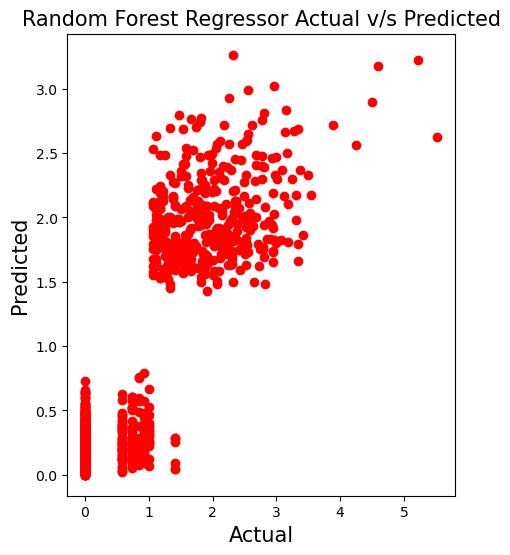

In [542]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test2, y = pred_RFR, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Random Forest Regressor Actual v/s Predicted', fontsize=15)
plt.show()

In [ ]:
Observation:
            1. we are able to see few number of samples are not following linear curve

In [543]:
print("r2_score on test data ", r2_score(y_test2, pred_RFR) * 100)

print("MAE ", mean_absolute_error(y_test2, pred_RFR))

print("MSE ", mean_squared_error(y_test2, pred_RFR))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, pred_RFR)))

r2_score on test data  79.93813131437966
MAE  0.2740218746580983
MSE  0.14316723554075422
RMSE  0.37837446470494573


In [ ]:
Observation:
            1. Random Forest Regressor model - training and validation accuracy using kfold cross 
               validation - 74.41%
            2. Random Forest Regressor model - Testing Accuracy - 79.93%
            3. Random Forest Regressor model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## Ridge Regression

In [544]:
from sklearn.linear_model import Ridge

In [545]:
kfold = KFold(n_splits = 5, shuffle = True)

In [546]:
ridge = Ridge()

In [547]:
ridge_scores1 = cross_val_score(ridge, x_scaled_1, y_train2, cv = kfold, scoring = 'r2')
ridge_scores1

array([0.76034224, 0.72133474, 0.73065934, 0.742805  , 0.71658589])

In [548]:
print(np.mean(ridge_scores1))

0.7343454422089535


In [549]:
ridge.fit(x_train2, y_train2)

Ridge()

In [550]:
ridge_test_acc = ridge.score(x_test2, y_test2)
print(ridge_test_acc)

0.8217667256896601


In [551]:
pred_ridge = ridge.predict(x_test2)
pred_ridge

array([ 0.01903589,  0.06167504,  0.12742231, ...,  0.03610289,
       -0.02438579,  0.15241725])

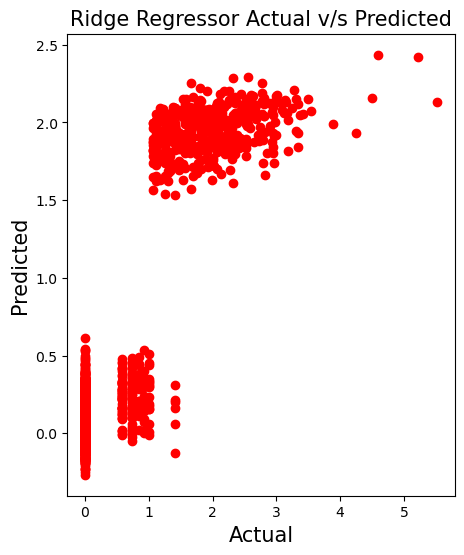

In [552]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test2, y = pred_ridge, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Ridge Regressor Actual v/s Predicted', fontsize=15)
plt.show()

In [ ]:
Observation: 
            1. we are able to see some number of samples are not following linear curve

In [553]:
print("r2_score on test data ", r2_score(y_test2, pred_ridge) * 100)

print("MAE ", mean_absolute_error(y_test2, pred_ridge))

print("MSE ", mean_squared_error(y_test2, pred_ridge))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, pred_ridge)))

r2_score on test data  82.17667256896601
MAE  0.22774350793873469
MSE  0.1271923646010011
RMSE  0.3566403855440395


Observation:
            1. Ridge Regressor model - training and validation accuracy using kfold cross 
               validation - 73.43%
            2. Ridge Regressor model - Testing Accuracy - 82.17%
            3. Ridge Regressor model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## XGBoost Regressor

In [306]:
!pip install xgboost

In [591]:
kfold = KFold(n_splits = 5, shuffle = True)

In [592]:
import xgboost as xgb

xg = xgb.XGBRegressor()

In [593]:
xg_scores1 = cross_val_score(xg, x_train2, y_train2, cv = kfold, scoring = 'r2')
xg_scores1

array([0.70377768, 0.73872347, 0.73228079, 0.70332412, 0.72670908])

In [594]:
print(np.mean(xg_scores1))  

0.7209630280620847


In [595]:
xg.fit(x_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [596]:
xg_test_acc = xg.score(x_test2, y_test2)
print(xg_test_acc)

0.7429282297301444


In [597]:
pred_xg = xg.predict(x_test2)
pred_xg

array([ 0.03207191, -0.06054627,  0.13518536, ...,  0.03803872,
       -0.04389754, -0.01936299], dtype=float32)

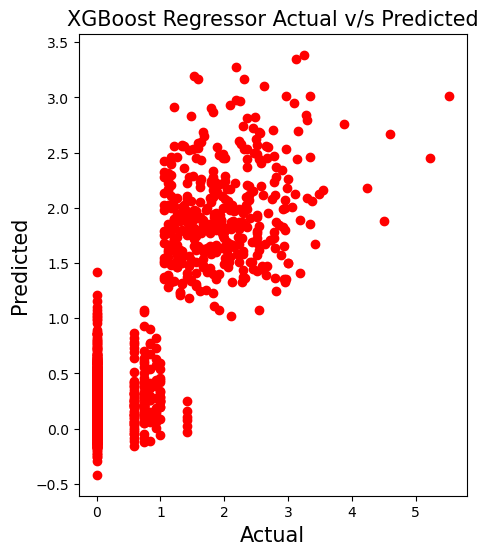

In [598]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test2, y = pred_xg, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('XGBoost Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see few number of samples are following linear curve

In [599]:
print("r2_score on test data ", r2_score(y_test2, pred_xg) * 100)

print("MAE ", mean_absolute_error(y_test2, pred_xg))

print("MSE ", mean_squared_error(y_test2, pred_xg))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, pred_xg)))

r2_score on test data  74.29282297301444
MAE  0.29369687346302803
MSE  0.18345377124057796
RMSE  0.428315037373868


In [ ]:
Observation:
            1. XGBoost Regressor model - training and validation accuracy using kfold cross 
               validation - 72.09%
            2. XGBoost Regressor model - Testing Accuracy - 74.29%
            3. XGBoost Regressor model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## KNN Regression

In [600]:
kfold = KFold(n_splits = 5, shuffle = True)

In [601]:
from sklearn.neighbors import KNeighborsRegressor

In [602]:
knn = KNeighborsRegressor()

In [603]:
knn_scores1 = cross_val_score(knn, x_scaled_1, y_train2, cv = kfold, scoring = 'r2')
knn_scores1

array([0.69679334, 0.69201657, 0.72337462, 0.68311391, 0.69975877])

In [604]:
print(np.mean(knn_scores1)) 

0.6990114439219284


In [605]:
knn.fit(x_train2, y_train2)

KNeighborsRegressor()

In [606]:
pred_knn = knn.predict(x_test2)
pred_knn

array([0.        , 0.11696071, 0.11696071, ..., 0.20979249, 0.        ,
       0.        ])

In [607]:
## Lets check how well model fits on test data

knn.score(x_test2, y_test2)

0.30194113462989625

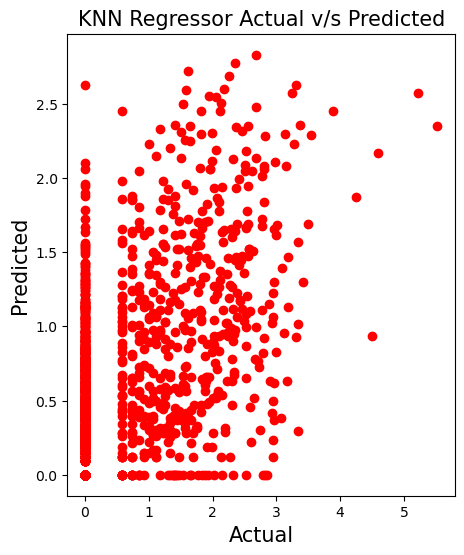

In [608]:
# Visualization of Actual v/s Predicted

# to check the relation between actual and predicted

plt.figure(figsize=(5, 6))
plt.scatter(x = y_test2, y = pred_knn, color = 'r')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('KNN Regressor Actual v/s Predicted', fontsize=15)
plt.show()

Observation:
            1. we are able to see good number of samples are not following linear curve

In [609]:
print("r2_score on test data ", r2_score(y_test2, pred_knn) * 100)

print("MAE ", mean_absolute_error(y_test2, pred_knn))

print("MSE ", mean_squared_error(y_test2, pred_knn))

print("RMSE ", np.sqrt(mean_squared_error(y_test2, pred_knn)))

r2_score on test data  30.194113462989623
MAE  0.4887200391935726
MSE  0.49815478092220916
RMSE  0.7058008082470643


Observation:
            1. KNN Regressor model - training and validation accuracy using kfold cross 
               validation - 69.90%
            2. KNN Regressor model - Testing Accuracy - 30.19%
            3. KNN Regressor model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

Observation:
            1. Linear Regression model - Testing Accuracy - 82.18%
            2. Random Forest Regressor model - Testing Accuracy - 79.93%
            3. Ridge Regressor model - Testing Accuracy - 82.17%
            4. XGBoost Regressor model - Testing Accuracy - 74.29%
            5. KNN Regressor model - Testing Accuracy - 30.19%
            5. We can choose Linear Regression Regressor model for hyper parameter tuning.

## HyperParameter Tuning for Linear Regression model as its accuracy is better 82.18%

In [610]:
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

In [611]:
kf = KFold(n_splits = 5, shuffle = True)

In [612]:
grid_search = GridSearchCV(model_LR, param_grid, scoring = 'r2', cv = kf)

In [613]:
grid_search.fit(x_train2, y_train2)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [614]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [615]:
model_LR_hyper_model = grid_search.best_estimator_

## Retrain the model

In [616]:
model_LR_hyper_model.fit(x_train2, y_train2)

LinearRegression(normalize=True)

In [617]:
model_LR_hyper_model.score(x_test2, y_test2)

0.8218242063091157

In [ ]:
Observation:
            1. Linear Regression model without hyper tuning - Testing Accuracy - 82.18%
            2. Linear Regression model with hyper parameter tuning - 82.18%
            3. We can choose Linear Regression model with/without hyper parameter tuning for prediction, 
               it has higher acc

## Saving the model

In [618]:
import pickle
filename = "Rainfall_Weather_Forecasting_Regression_Model.pkl"
pickle.dump(model_LR_hyper_model, open(filename, 'wb'))

## Predict the saved model

In [619]:
# lets load the saved model and get the prediction

loaded_model1 = pickle.load(open('Rainfall_Weather_Forecasting_Regression_Model.pkl', 'rb'))

In [620]:
loaded_model1.score(x_test2, y_test2)

0.8218242063091157

In [621]:
prediction = loaded_model1.predict(x_test2)
prediction

array([ 0.01901192,  0.06152412,  0.12711942, ...,  0.03629195,
       -0.02408574,  0.15200915])

In [625]:
y_test2[12:]

4660    0.000000
4661    1.410451
4662    0.000000
4663    0.000000
4664    2.351335
          ...   
6635    0.000000
6636    0.000000
6637    0.000000
6638    0.000000
6639    0.000000
Name: Rainfall, Length: 1980, dtype: float64

In [628]:
# comparing the predicted and actual values

a = np.array(y_test2)
df1 = pd.DataFrame()
df1['Predicted'] = prediction
df1['Original'] = a
df1

Predicted  Original
0      0.019012       0.0
1      0.061524       0.0
2      0.127119       0.0
3     -0.026245       0.0
4      0.035622       0.0
...         ...       ...
1987  -0.052288       0.0
1988  -0.044853       0.0
1989   0.036292       0.0
1990  -0.024086       0.0
1991   0.152009       0.0

[1992 rows x 2 columns]

Observation:
            1. Actual and predicted values almost matches
            2. This Rainfall_Weather_Forecasting_Regression_Model.pkl can be used to predict how much
               rainfall could be there.

In [ ]:
Observation:
            1. Linear Regression model without hyper tuning - Testing Accuracy - 82.18%
            2. Linear Regression model with hyper parameter tuning - 82.18%
            3. Random Forest Regressor model - Testing Accuracy - 79.93%
            4. Ridge Regressor model - Testing Accuracy - 82.17%
            5. XGBoost Regressor model - Testing Accuracy - 74.29%
            6. KNN Regressor model - Testing Accuracy - 30.19%
            7. Comparing the models - Linear Regression model with hyper parameter tuning has 
                the higher accuracy and also there is no overfitting of the model

In [ ]:
Final Observation:
            1. To predict whether or not it will rain tomorrow - Extra Tree Classifier model 
                with hyper parameter tuning for prediction - 89.53%
            2. To predict how much rainfall could be there - Linear Regression model 
                with hyper parameter tuning - 82.18%  